In [1]:
using CmdStan, Distributions, Dates, CairoMakie
using DataFrames, CSV, Query

In [2]:
ENV["JULIA_CMDSTAN_HOME"]="/Users/marlinfiggins/cmdstan/"

"/Users/marlinfiggins/cmdstan/"

In [3]:
include("../src/BayesTS/BayesTS.jl")

using .BayesTS

In [4]:
# Load helper functions 
include("../src/BayesTShelpers.jl")
include("../src/DataHelpers.jl")
include("../src/InferenceHelpers.jl")
include("../src/lifetimes.jl")
include("../src/PlotFunctions.jl")
include("../src/PosteriorHelpers.jl")

get_quants

In [5]:
df = DataFrame(CSV.File("../data/raw/cases-lineage-sequence-counts-2021-09-23.tsv"))

9982×12 DataFrame
  Row │ state    date        cases  sequences_total  sequences_other  sequence ⋯
      │ String   Date        Int64  Int64            Int64            Int64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Alabama  2021-01-28   2340                0                0           ⋯
    2 │ Alabama  2021-01-29   1967                5                5
    3 │ Alabama  2021-01-30   1253                0                0
    4 │ Alabama  2021-01-31   1228                1                1
    5 │ Alabama  2021-02-01   2476               15               13           ⋯
    6 │ Alabama  2021-02-02   1997               17               17
    7 │ Alabama  2021-02-03   1742                1                0
    8 │ Alabama  2021-02-04   1649                2                2
    9 │ Alabama  2021-02-05   1582               39               37           ⋯
   10 │ Alabama  2021-02-06    979               27               26
   11 │ Alabama  2021-02-07    922                1                0
  ⋮   │    ⋮         ⋮         ⋮           ⋮                ⋮                  ⋱
 9973 │ Wyoming  2021-08-23    299               62                0
 9974 │ Wyoming  2021-08-24    507               53                0           ⋯
 9975 │ Wyoming  2021-08-25    459               60                1
 9976 │ Wyoming  2021-08-26    467               82                0
 9977 │ Wyoming  2021-08-27    472               44                0
 9978 │ Wyoming  2021-08-28    429               27                0           ⋯
 9979 │ Wyoming  2021-08-29    429               42               15
 9980 │ Wyoming  2021-08-30    431               66               14
 9981 │ Wyoming  2021-08-31    380               53                0
 9982 │ Wyoming  2021-09-01    871               43                0           ⋯
                                                 7 columns and 9961 rows omitted

In [10]:
g = generation_time(20, 5.0, 0.3)
onset = onset_time(20, 4.5, 0.6, 0.8)

20-element Vector{Float64}:
 0.15422107788295136
 0.5979776824957601
 0.8
 0.7462640695453
 0.6021072988929602
 0.45527929483634866
 0.33419359901772533
 0.24227494594996882
 0.175034123856333
 0.12664182163034848
 0.09201514722705773
 0.06723952335640869
 0.049455997273909
 0.0366271997771212
 0.02731671924777422
 0.020515169042784314
 0.015512579078432101
 0.011807873345391351
 0.009045677113215203
 0.006972500059309538

In [11]:
num_SoI = size(filter(row -> row.state == "Washington", df), 1)
seed_L = 14
forecast_L = 0

0

In [12]:
# Choose Basis Model
model = SplineTrend(20,  num_SoI, 4)
prior_model = [["LAS"]]

1-element Vector{Vector{String}}:
 ["LAS"]

In [13]:
states_dict = process_all_states("../src/stan_models/Rt_Structured_lineage.stan", df, 
    g, onset, 
    seed_L, forecast_L, 
    model; priors = prior_model, 
    model_name = "rt-lineage-all-states-09-23-21")

Dict{Any, Any} with 46 entries:
  "Colorado"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Texas"          => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Alabama"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Vermont"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Missouri"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Wyoming"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "California"     => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Maine"          => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "New_Mexico"     => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Tennessee"      => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Nevada"         => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Kentucky"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.

# Plot aes

In [10]:
lineage_colors =["#2e5eaa", "#5adbff", "#b4c5e4","#f5bb00","#56e39f", "#9e4244", "#f03a47", "#808080"] 

alphas = [0.65, 0.45, 0.35]
ps = [0.5 0.8 0.95]
lQuants = 0.5 * (1. .- ps)
uQuants = 0.5 * (1. .+ ps)

1×3 Matrix{Float64}:
 0.75  0.9  0.975

## Loading states

In [11]:
states_to_plot = ["Washington", "Michigan", "New_York", "Hawaii",  "Louisiana", "Florida"]
#states_to_plot = collect(keys(states_dict))

6-element Vector{String}:
 "Washington"
 "Michigan"
 "New_York"
 "Hawaii"
 "Louisiana"
 "Florida"

In [12]:
for s in states_to_plot
    load_state_samples!(s, states_dict)
    println("Loaded state $s")
end

Loaded state Washington
Loaded state Michigan
Loaded state New_York
Loaded state Hawaii
Loaded state Louisiana
Loaded state Florida


## Preprint Figures

## Figure 1: Synthetic Data

Going to need to load samples and synthetic data

In [12]:
synthetic_df = DataFrame(CSV.File("../data/processed/synthetic_data.csv"))
syn_dict = process_all_states("../src/stan_models/Rt_Structured_lineage_ind.stan", synthetic_df, 
    g, onset, 
    seed_L, 0, 
    model; priors = prior_model, 
    model_name = "synthetic")
load_state_samples!("synthetic", syn_dict)

8937-element Vector{String}:
 "lp__"
 "accept_stat__"
 "stepsize__"
 "treedepth__"
 "n_leapfrog__"
 "divergent__"
 "energy__"
 "b.1.1"
 "b.2.1"
 "b.3.1"
 "b.4.1"
 "b.5.1"
 "b.6.1"
 ⋮
 "obs_freqs.389.2"
 "obs_freqs.390.2"
 "obs_freqs.391.2"
 "obs_freqs.392.2"
 "obs_freqs.393.2"
 "obs_freqs.394.2"
 "obs_freqs.395.2"
 "obs_freqs.396.2"
 "obs_freqs.397.2"
 "obs_freqs.398.2"
 "obs_freqs.399.2"
 "obs_freqs.400.2"

In [13]:
function make_plot_dataframe(obs_cases, obs_counts, lineage_names, state_name)
    cases = Int[]
    counts = Int[]
    obs_freqs = Float64[]
    dates = Int[]
    lineages = String[]
    lineages_num = Int[]
    state = String[]
    
    T = length(obs_cases)
    N_lineage = size(obs_counts,2)
    
    obs_freq = obs_counts ./ sum(obs_counts, dims=2)
    
    
    for lineage in 1:N_lineage
        dates = vcat(dates, collect(1:T))
        cases = vcat(cases, obs_cases)
        counts = vcat(counts, obs_counts[:, lineage])
        obs_freqs = vcat(obs_freqs, obs_freq[:, lineage])
        lineages_num = vcat(lineages_num, repeat([lineage], T))
        lineages  = vcat(lineages, repeat([lineage_names[lineage]], T))
        state = vcat(state, repeat([state_name], T))
    end
    
    return DataFrame(date = dates, cases = cases, counts = Int.(counts), obs_freqs = obs_freqs, lineage = lineages, lineage_num = lineages_num, state = state)   
end

make_plot_dataframe (generic function with 1 method)

In [ ]:

# Subfigure 1: Case data colored by actual identity with population R_t same axis

# Subfigure 2: Just the case data

# Subfigure 3: Sequence samples colored by lineage

# Subfigure 4: Inferred lineage Rt versus truth

# Subfigure 5: Inferred lineage infections versus truth

# Subfigure 6:

# A: Epidemics are made of different variants
# B: We often compute single Rt which is an average over the population
# C: Luckily, in addition to case counts, we have sequences of different lineages whioch
# D: We can get at the actual growth rates of different lineages with the above types of data

In [202]:
function make_fig_1(SoI, states_dict, colors)
    seq_labels, dates, dates_num, seed_L = unpack_params(SoI, states_dict)
    lineage_map = get_sequence_map(seq_labels)
    cases = states_dict[SoI]["stan_data"]["cases"]
    counts =  states_dict[SoI]["stan_data"]["num_sequenced"]
    plot_data = make_plot_dataframe(cases, counts, seq_labels, SoI)
    color_vec = [colors[i] for i in plot_data.lineage_num]

    
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (3200, 2600), fontsize = 32, font = "Helvetica")

    ##################### CASES AND AGGREGATE SMOOTH ###############
    g_cases_rt =  fig[1:3,1:2] = GridLayout()
    ax_cases = Axis(g_cases_rt[1:2,1], ylabel = "Observed Cases")
    barplot!(ax_cases, dates_num, cases, color = (:black, 0.3))
    hidexdecorations!(ax_cases, grid=false)
    
    EC_smooth = get_posterior(states_dict, SoI, "EC_smooth.", false)
    med, lQ, uQ = get_quants(EC_smooth, ps)

    barplot!(ax_cases, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax_cases, dates_num, 
            lQ[i],  uQ[i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax_cases, dates_num, med, color = "black", linewidth = 1.5, label = "Median")
    
    # TIME AXIS 
    ticks, _ = get_nice_ticks(dates)
    ax_cases.xticks = ticks
    ################################################################
    
    ##################### AVERAGE RT ###############################
    ax_rt_2 = Axis(g_cases_rt[3,1], ylabel = L"R_{t}")
    
    hlines!(ax_rt_2, [1.], color = "black", linestyle=:dash)  
    R_average = get_posterior(states_dict, SoI, "R_average.", false)
    med, lQ, uQ = get_quants(R_average, ps)
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax_rt_2, dates_num, 
            lQ[i],  uQ[i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax_rt_2, dates_num, med, color = "black", linewidth = 1.5, label = "Median")
    
    #yaxis_right!(ax_rt_2)
    ticks, _ = get_nice_ticks(dates)
    ax_rt_2.xticks = ticks
    ax_rt_2.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])  
    ################################################################

    
    
    g_variant = fig[1:3, 3:4] = GridLayout()
    
    ##################### EFFECTIVE REPRODUCTIVE NUMBER ############################
    #g_Rt = fig[5, 1:2] = GridLayout()
    ax_Rt = Axis(g_variant[3,1:2]) #, ylabel = L"R_t")
    
    R = get_posterior(states_dict, SoI, "R.", true)
    med, lQ, uQ = get_quants(R, ps)
    
    hlines!(ax_Rt, [1.], color = "black", linestyle=:dash)  
    
    # Only plotting Rt for variants of high enough frequency
    sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
    med_freq, _, _ = get_quants(sim_freq, ps)

    
    for (lineage, name) in enumerate(seq_labels)
        this_color = colors[lineage_map[name]]
        
        # Which dates have posterior_median_frequency > 0.001
        idx_plot = findall(x -> (x > 0.001), med_freq[:,lineage])
        
        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_Rt, dates_num[idx_plot], 
                lQ[i][idx_plot,lineage], uQ[i][idx_plot,lineage], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_Rt, dates_num[idx_plot], med[idx_plot,lineage], color = "black", label = "Median")
    end
    
    ticks, _ = get_nice_ticks(dates)
    ax_Rt.xticks = ticks
    ax_Rt.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])    
    ################################################################
   
    ##################### CASE LINEAGE PREV ############################    
    # Posterior lineage cases
    #g_smooth_lin = fig[4,1:2] = GridLayout()
    ax_smooth_lin = Axis(g_variant[1:2,1:2])
    
    scaled_prev = get_posterior(states_dict, SoI, "scaled_prev.", true)
    med, lQ, uQ = get_quants(scaled_prev, ps)
    
    barplot!(ax_smooth_lin, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))

    for (lineage, name) in enumerate(seq_labels)
        this_color = colors[lineage_map[name]]

        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_smooth_lin, dates_num, 
                lQ[i][:,lineage], uQ[i][:,lineage], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_smooth_lin, dates_num, med[:,lineage], color = "black", linewidth = 1.5, label = "Median")
    end
    
    # TIME AXIS
    ticks, _ = get_nice_ticks(dates)
    ax_smooth_lin.xticks = ticks
    hidexdecorations!(ax_smooth_lin, grid = false)
    ################################################################
    
    ### LINKING a and b
    linkyaxes!(ax_cases,ax_smooth_lin)
    hideydecorations!(ax_smooth_lin, grid = false)
    linkyaxes!(ax_rt_2, ax_Rt)
    hideydecorations!(ax_Rt, grid = false)
    ###
    
    
    ##################### PLOTTING ORIGINAL SAMPLES ################
    g_seq_count = fig[4:5,1:4] = GridLayout()
    
    ax_obs_cases = Axis(g_seq_count[1:2,2], ylabel = "Observed Cases")
    barplot!(ax_obs_cases, dates_num, cases, color = (:black, 0.3))
    ticks, _ = get_nice_ticks(dates)
    ax_obs_cases.xticks = ticks[1:2:end]
    ax_obs_cases.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])    
    
    ax_seq_count = Axis(g_seq_count[1,1], ylabel = "Observed Counts")
    barplot!(ax_seq_count, plot_data.date, plot_data.counts, 
        stack = plot_data.lineage_num,
        color = color_vec)    
    
    ##################### PLOTTING OBSERVED FREQ ################
    #g_seq_freq = fig[3,2] = GridLayout()
    ax_seq_freq = Axis(g_seq_count[2,1], ylabel = "Sample Frequency")
    barplot!(ax_seq_freq, plot_data.date, plot_data.obs_freqs, 
        stack = plot_data.lineage_num,
        color = color_vec)    
    
    linkxaxes!(ax_seq_count, ax_seq_freq)
    hidexdecorations!(ax_seq_count, grid = false)
    
    ticks, _ = get_nice_ticks(dates)
    ax_seq_freq.xticks = ticks[1:2:end]
    ax_seq_freq.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])    
    
    
    ##################### PLOTTING APPROX LINEAGE ################

    
    ax_true_cases = Axis(g_seq_count[1:2,3])
    
    sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
    med, lQ, uQ = get_quants(sim_freq, ps)
    
    plot_data.sim_freqs = reduce(vcat, [m for m in eachcol(med)])
    barplot!(ax_true_cases, plot_data.date, plot_data.cases .* plot_data.sim_freqs, 
        stack = plot_data.lineage_num,
        color = color_vec)    
    
    
    ticks, _ = get_nice_ticks(dates)
    ax_true_cases.xticks = ticks[1:2:end]
    ax_true_cases.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])   

    linkyaxes!(ax_obs_cases, ax_true_cases)
    hideydecorations!(ax_true_cases, grid = false)
    ################################################################
    
    for (label, layout) in zip(["(a)", "(b)", "(c)"], [g_cases_rt, g_seq_count, g_variant])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 60,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    
    fig
end

make_fig_1 (generic function with 1 method)

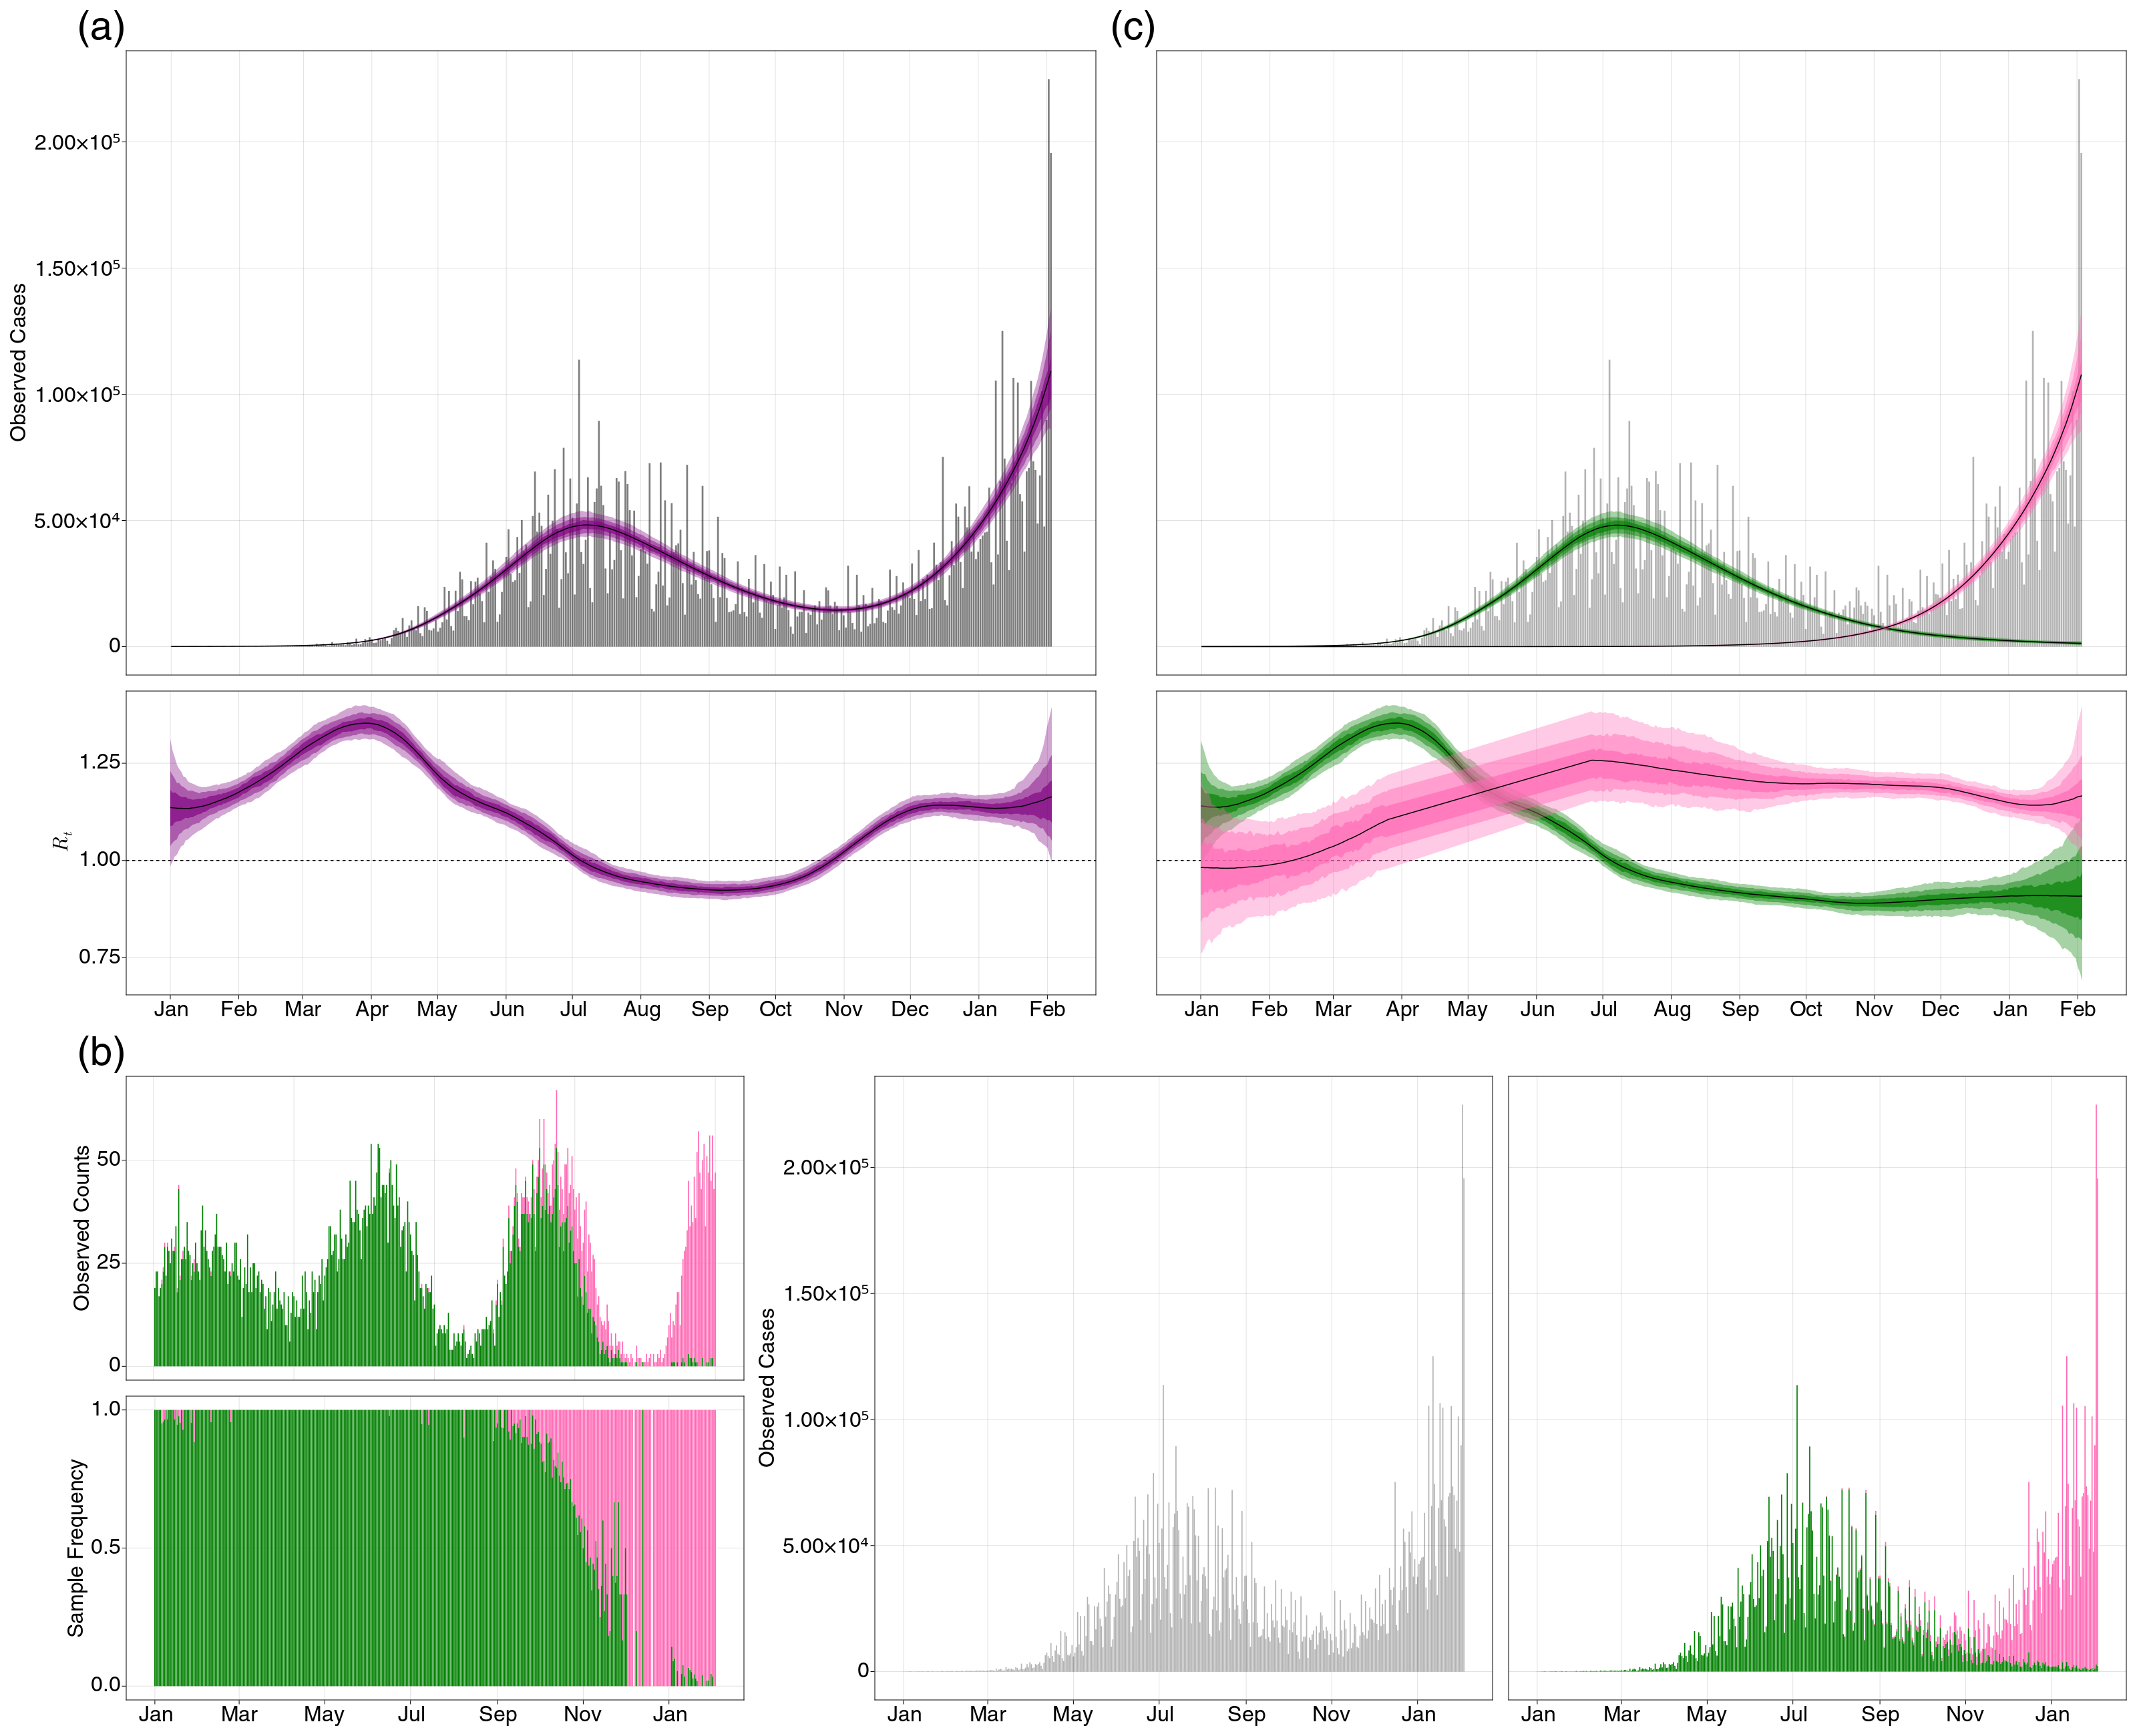

In [203]:
fig_1 = make_fig_1("synthetic", syn_dict, ["green", "hotpink"])

In [204]:
save("../manuscript/figs/fig_1.png", fig_1)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007fb6f12670a0, 3200.0, 2600.0)


## Figure 2: Washington State Outbreak

In [16]:
# May Scrap later
function make_fig_2(SoI, states_dict, pred)
    seq_labels, dates, dates_num, seed_L = unpack_params(SoI, states_dict)
    lineage_map = get_sequence_map(seq_labels)
    WHO_seq_names = [lineage_to_WHO[lineage] for lineage in seq_labels]
    
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (1800, 1800), fontsize = 32, font = "Helvetica")

    # Posterior smooth prevalence 
    #TODO: Replace with EC_smooth
    g_smooth = fig[1:4,1] = GridLayout()
    ax_smooth = Axis(g_smooth[1,1], ylabel = "Posterior Smoothed Cases")
    
    EC_smooth = get_posterior(states_dict, SoI, "EC_smooth.", false)
    EC_smooth = vcat(hcat(EC_smooth...))
    med = median(EC_smooth, dims = 2)
    lQ = vcat([quantile(vi, lQuants) for vi in eachrow(EC_smooth)]...)
    uQ = vcat([quantile(vi, uQuants) for vi in eachrow(EC_smooth)]...)

    barplot!(ax_smooth, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax_smooth, dates_num, 
            lQ[:,i],  uQ[:,i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax_smooth, dates_num, med[:,1], color = "black", linewidth = 1.5, label = "Median")
    
    # TIME AXIS 
    ticks, _ = get_nice_ticks(dates)
    ax_smooth.xticks = ticks
        
    hidexdecorations!(ax_smooth, grid = false)
    println("Made smoothed I_prev")
    
    # Frequency plot
    g_freq = fig[5:8, 1] = GridLayout()
    
    # Loading in frequency data
    sample_freq = states_dict[SoI]["stan_data"]["num_sequenced"] ./ sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2)
    N_sequenced = vec(sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2))
    
    if pred == false
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Lineage Frequency")
        sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
        lQ, uQ, med = sim_stats_multi(sim_freq, lQuants, uQuants)
        lQ, uQ, med = parse_by_deme(lQ, uQ, med)

        for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[lineage][:,i], uQ[lineage][:,i], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.75,
                markersize = 0.5 * sqrt.(N_sequenced))
       end
    else
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Sample Frequency")
        obs_freq = get_posterior(states_dict, SoI, "obs_freq", true)
        lQ, uQ, med = sim_stats_multi(obs_freq, lQuants, uQuants)
        lQ, uQ, med = parse_by_deme(lQ, uQ, med)

       for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[lineage][:,i], uQ[lineage][:,i], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.5,
                markersize = 5)
        end
    end

    ticks, _ = get_nice_ticks(dates)
    ax_freq.xticks = ticks
    ax_freq.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
 
    linkxaxes!(ax_smooth, ax_freq)
    println("Made frequencies plots")

    # COLUMN 2
    
    # Posterior lineage cases
    g_smooth_lin = fig[1:4,2] = GridLayout()
    ax_smooth_lin = Axis(g_smooth_lin[1,1],ylabel = "Posterior Lineage Cases")
    
    lin_prev = get_posterior(states_dict, SoI, "lineage_prev.", true)
    mean_rho =  mean.(get_posterior(states_dict, SoI, "rho.", false))
    scaled_prev = [lin_prev[i] .* mean_rho[i] for i in 1:length(mean_rho)]
    lQ, uQ, med = sim_stats_multi(scaled_prev, lQuants, uQuants)
    lQ, uQ, med = parse_by_deme(lQ, uQ, med)
    
    #barplot!(ax_smooth_lin, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))

    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]

        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_smooth_lin, dates_num, 
                lQ[lineage][:,i], uQ[lineage][:,i], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_smooth_lin, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
    end
    
    # TIME AXIS
    ticks, _ = get_nice_ticks(dates)
    ax_smooth_lin.xticks = ticks
    hidexdecorations!(ax_smooth_lin, grid = false)

    # Link y-axes with other smooth
    hideydecorations!(ax_smooth_lin, grid = false)
    linkyaxes!(ax_smooth, ax_smooth_lin)
    println("Made posterior lineage I_prev")
    
    # Effective Reproductive Number Panel
    g_Rt = fig[5:6, 2] = GridLayout()
    ax_Rt = Axis(g_Rt[1,1], ylabel = L"R_t")
    
    R = get_posterior(states_dict, SoI, "R.", true)
    lQ, uQ, med = sim_stats_multi(R, lQuants, uQuants)
    lQ, uQ, med = parse_by_deme(lQ, uQ, med)
    
    
    lines!(ax_Rt, dates_num, fill(1., length(dates_num)), color = "black", linestyle=:dash)  
    
    # Only plotting Rt for variants of high enough frequency
    sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
    lQ_freq, uQ_freq, med_freq = sim_stats_multi(sim_freq, lQuants, uQuants)
    _, _, med_freq = parse_by_deme(lQ_freq, uQ_freq, med_freq)
    
    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]
        
        # Which dates have posterior_median_frequency > 0.001
        idx_plot = findall(x -> (x > 0.001), med_freq[lineage][:,1])
        
        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_Rt, dates_num[idx_plot], 
                lQ[lineage][idx_plot,i], uQ[lineage][idx_plot,i], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_Rt, dates_num[idx_plot], med[lineage][idx_plot,1], color = "black", label = "Median")
    end
    
    ticks, _ = get_nice_ticks(dates)
    ax_Rt.xticks = ticks
    ax_Rt.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
    
    linkxaxes!(ax_smooth_lin, ax_Rt)
    println("Made Rt")
    
    # Growth Advantage
    g_growth = fig[7:8, 2] = GridLayout()
    ax_growth = Axis(g_growth[1,1],ylabel = "Growth Advantage")

    v = get_posterior(states_dict, SoI, "v", false)
    v = vcat(hcat(v...)')
    med = median(v, dims = 1)
    lQ = vcat([quantile(vi, lQuants) for vi in eachcol(v)]...)
    uQ = vcat([quantile(vi, uQuants) for vi in eachcol(v)]...) 

    lines!(ax_growth, [0.5, length(seq_labels)-1 + 0.5], [1.0, 1.0], color = :black, linestyle = :dash)
    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        violin!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), 
            color = this_color, 
            orientation=:vertical,
            width = 0.45,
            strokewidth = 0.5,
            strokecolor = :black)
        scatter!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), color = (:black, 0.1))
    end

    ax_growth.xticks = 1:(length(seq_labels)-1)
    ax_growth.xtickformat = xs -> WHO_seq_names[convert.(Int,xs)]
    println("Made Growth")

    # Adding legend
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[9,1:2] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)

    for (label, layout) in zip(["a", "b", "c", "d", "e"], [g_smooth, g_smooth_lin, g_freq, g_Rt, g_growth])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 40,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    fig 
end

make_fig_2 (generic function with 1 method)

In [19]:
function make_fig_2_HDI(SoI, states_dict, pred)
    seq_labels, dates, dates_num, seed_L = unpack_params(SoI, states_dict)
    lineage_map = get_sequence_map(seq_labels)
    WHO_seq_names = [lineage_to_WHO[lineage] for lineage in seq_labels]
    
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (1800, 1800), fontsize = 32, font = "Helvetica")

    # Posterior smooth prevalence 
    g_smooth = fig[1:4,1] = GridLayout()
    ax_smooth = Axis(g_smooth[1,1], ylabel = "Posterior Smoothed Cases")
    
    EC_smooth = get_posterior(states_dict, SoI, "EC_smooth.", false)
    med, lQ, uQ = get_quants(EC_smooth, ps)

    barplot!(ax_smooth, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax_smooth, dates_num, 
            lQ[i],  uQ[i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax_smooth, dates_num, med, color = "black", linewidth = 1.5, label = "Median")
    
    # TIME AXIS 
    ticks, _ = get_nice_ticks(dates)
    ax_smooth.xticks = ticks
        
    hidexdecorations!(ax_smooth, grid = false)
    println("Made smoothed I_prev")
    
    ##################################################################################
    
    # Frequency plot
    g_freq = fig[5:8, 1] = GridLayout()
    
    # Loading in frequency data
    sample_freq = states_dict[SoI]["stan_data"]["num_sequenced"] ./ sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2)
    N_sequenced = vec(sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2))
    
    if pred == false
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Lineage Frequency")
        sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
        med, lQ, uQ = get_quants(sim_freq, ps)


        for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[i][:,lineage], uQ[i][:,lineage], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[:,lineage], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.75,
                markersize = 0.5 * sqrt.(N_sequenced))
       end
    else
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Sample Frequency")
        obs_freq = get_posterior(states_dict, SoI, "obs_freq", true)
        med, lQ, uQ = get_quants(obs_freq, ps)


       for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[i][:,lineage], uQ[i][:,lineage], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[:,lineage], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.5,
                markersize = 5)
        end
    end

    ticks, _ = get_nice_ticks(dates)
    ax_freq.xticks = ticks
    ax_freq.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
 
    linkxaxes!(ax_smooth, ax_freq)
    println("Made frequencies plots")

    ######################## COLUMN 2 ###############################
    
    # Posterior lineage cases
    g_smooth_lin = fig[1:4,2] = GridLayout()
    ax_smooth_lin = Axis(g_smooth_lin[1,1],ylabel = "Posterior Lineage Cases")
    
    scaled_prev = get_posterior(states_dict, SoI, "scaled_prev.", true)
    med, lQ, uQ = get_quants(scaled_prev, ps)
    
    #barplot!(ax_smooth_lin, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))

    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]

        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_smooth_lin, dates_num, 
                lQ[i][:,lineage], uQ[i][:,lineage], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_smooth_lin, dates_num, med[:,lineage], color = "black", linewidth = 1.5, label = "Median")
    end
    
    # TIME AXIS
    ticks, _ = get_nice_ticks(dates)
    ax_smooth_lin.xticks = ticks
    hidexdecorations!(ax_smooth_lin, grid = false)

    # Link y-axes with other smooth
    hideydecorations!(ax_smooth_lin, grid = false)
    linkyaxes!(ax_smooth, ax_smooth_lin)
    println("Made posterior lineage I_prev")

###########################################################################################################
    # Effective Reproductive Number Panel
    g_Rt = fig[5:6, 2] = GridLayout()
    ax_Rt = Axis(g_Rt[1,1], ylabel = L"R_t")
    
    R = get_posterior(states_dict, SoI, "R.", true)
    med, lQ, uQ = get_quants(R, ps)
    
    lines!(ax_Rt, dates_num, fill(1., length(dates_num)), color = "black", linestyle=:dash)  
    
    # Only plotting Rt for variants of high enough frequency
    sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
    med_freq, _, _ = get_quants(sim_freq, ps)

    
    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]
        
        # Which dates have posterior_median_frequency > 0.001
        idx_plot = findall(x -> (x > 0.001), med_freq[:,lineage])
        
        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_Rt, dates_num[idx_plot], 
                lQ[i][idx_plot,lineage], uQ[i][idx_plot,lineage], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_Rt, dates_num[idx_plot], med[idx_plot,lineage], color = "black", label = "Median")
    end
    
    ticks, _ = get_nice_ticks(dates)
    ax_Rt.xticks = ticks
    ax_Rt.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
    
    linkxaxes!(ax_smooth_lin, ax_Rt)
    println("Made Rt")
    
############### #################################################
    # Growth Advantage
    g_growth = fig[7:8, 2] = GridLayout()
    ax_growth = Axis(g_growth[1,1],ylabel = "Growth Advantage")

    v = get_posterior(states_dict, SoI, "v", false)
    med, lQ, uQ = get_quants(v, ps)
    v = vcat(hcat(v...)')

    lines!(ax_growth, [0.5, length(seq_labels)-1 + 0.5], [1.0, 1.0], color = :black, linestyle = :dash)
    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        violin!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), 
            color = this_color, 
            orientation=:vertical,
            width = 0.45,
            strokewidth = 0.5,
            strokecolor = :black)
        scatter!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), color = (:black, 0.1))
    end

    ax_growth.xticks = 1:(length(seq_labels)-1)
    ax_growth.xtickformat = xs -> WHO_seq_names[convert.(Int,xs)]
    println("Made Growth")

    # Adding legend
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[9,1:2] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)

    for (label, layout) in zip(["(a)", "(b)", "(c)", "(d)", "(e)"], [g_smooth, g_smooth_lin, g_freq, g_Rt, g_growth])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 60,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    fig 
end

make_fig_2_HDI (generic function with 1 method)

In [20]:
lineage_colors = ["#2e5eaa", "#5adbff", "#b4c5e4","#f5bb00","#56e39f", "#9e4244", "#f03a47", "#808080"]

8-element Vector{String}:
 "#2e5eaa"
 "#5adbff"
 "#b4c5e4"
 "#f5bb00"
 "#56e39f"
 "#9e4244"
 "#f03a47"
 "#808080"

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


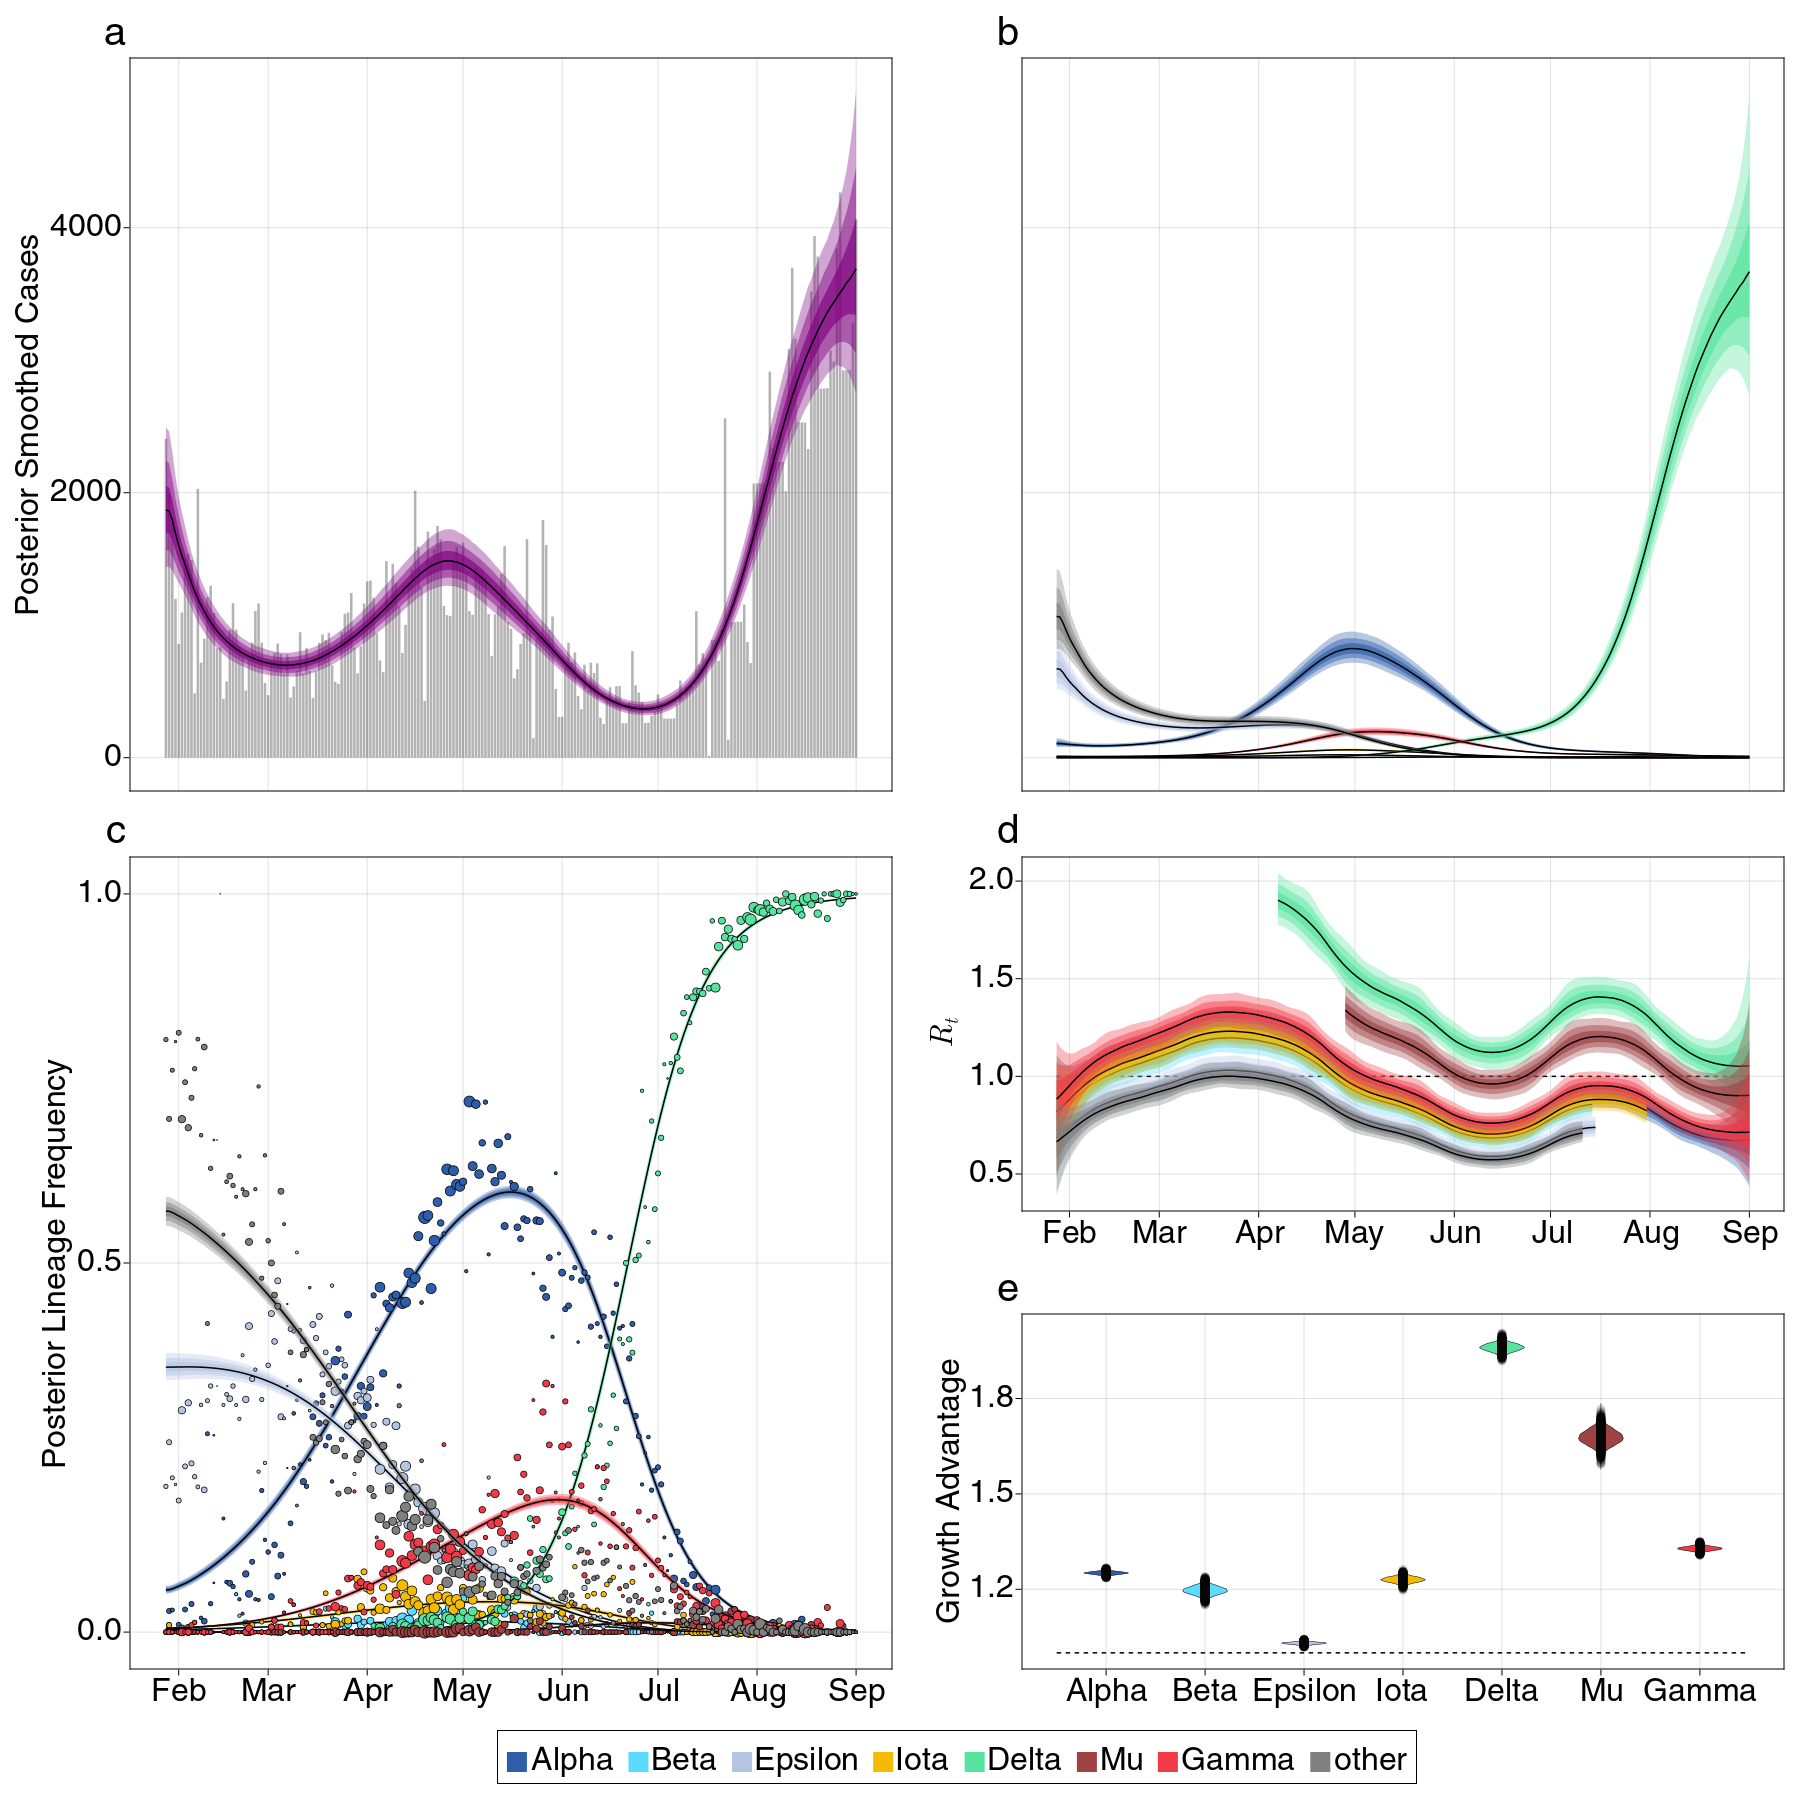

In [17]:
fig_2_A = make_fig_2("Washington", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


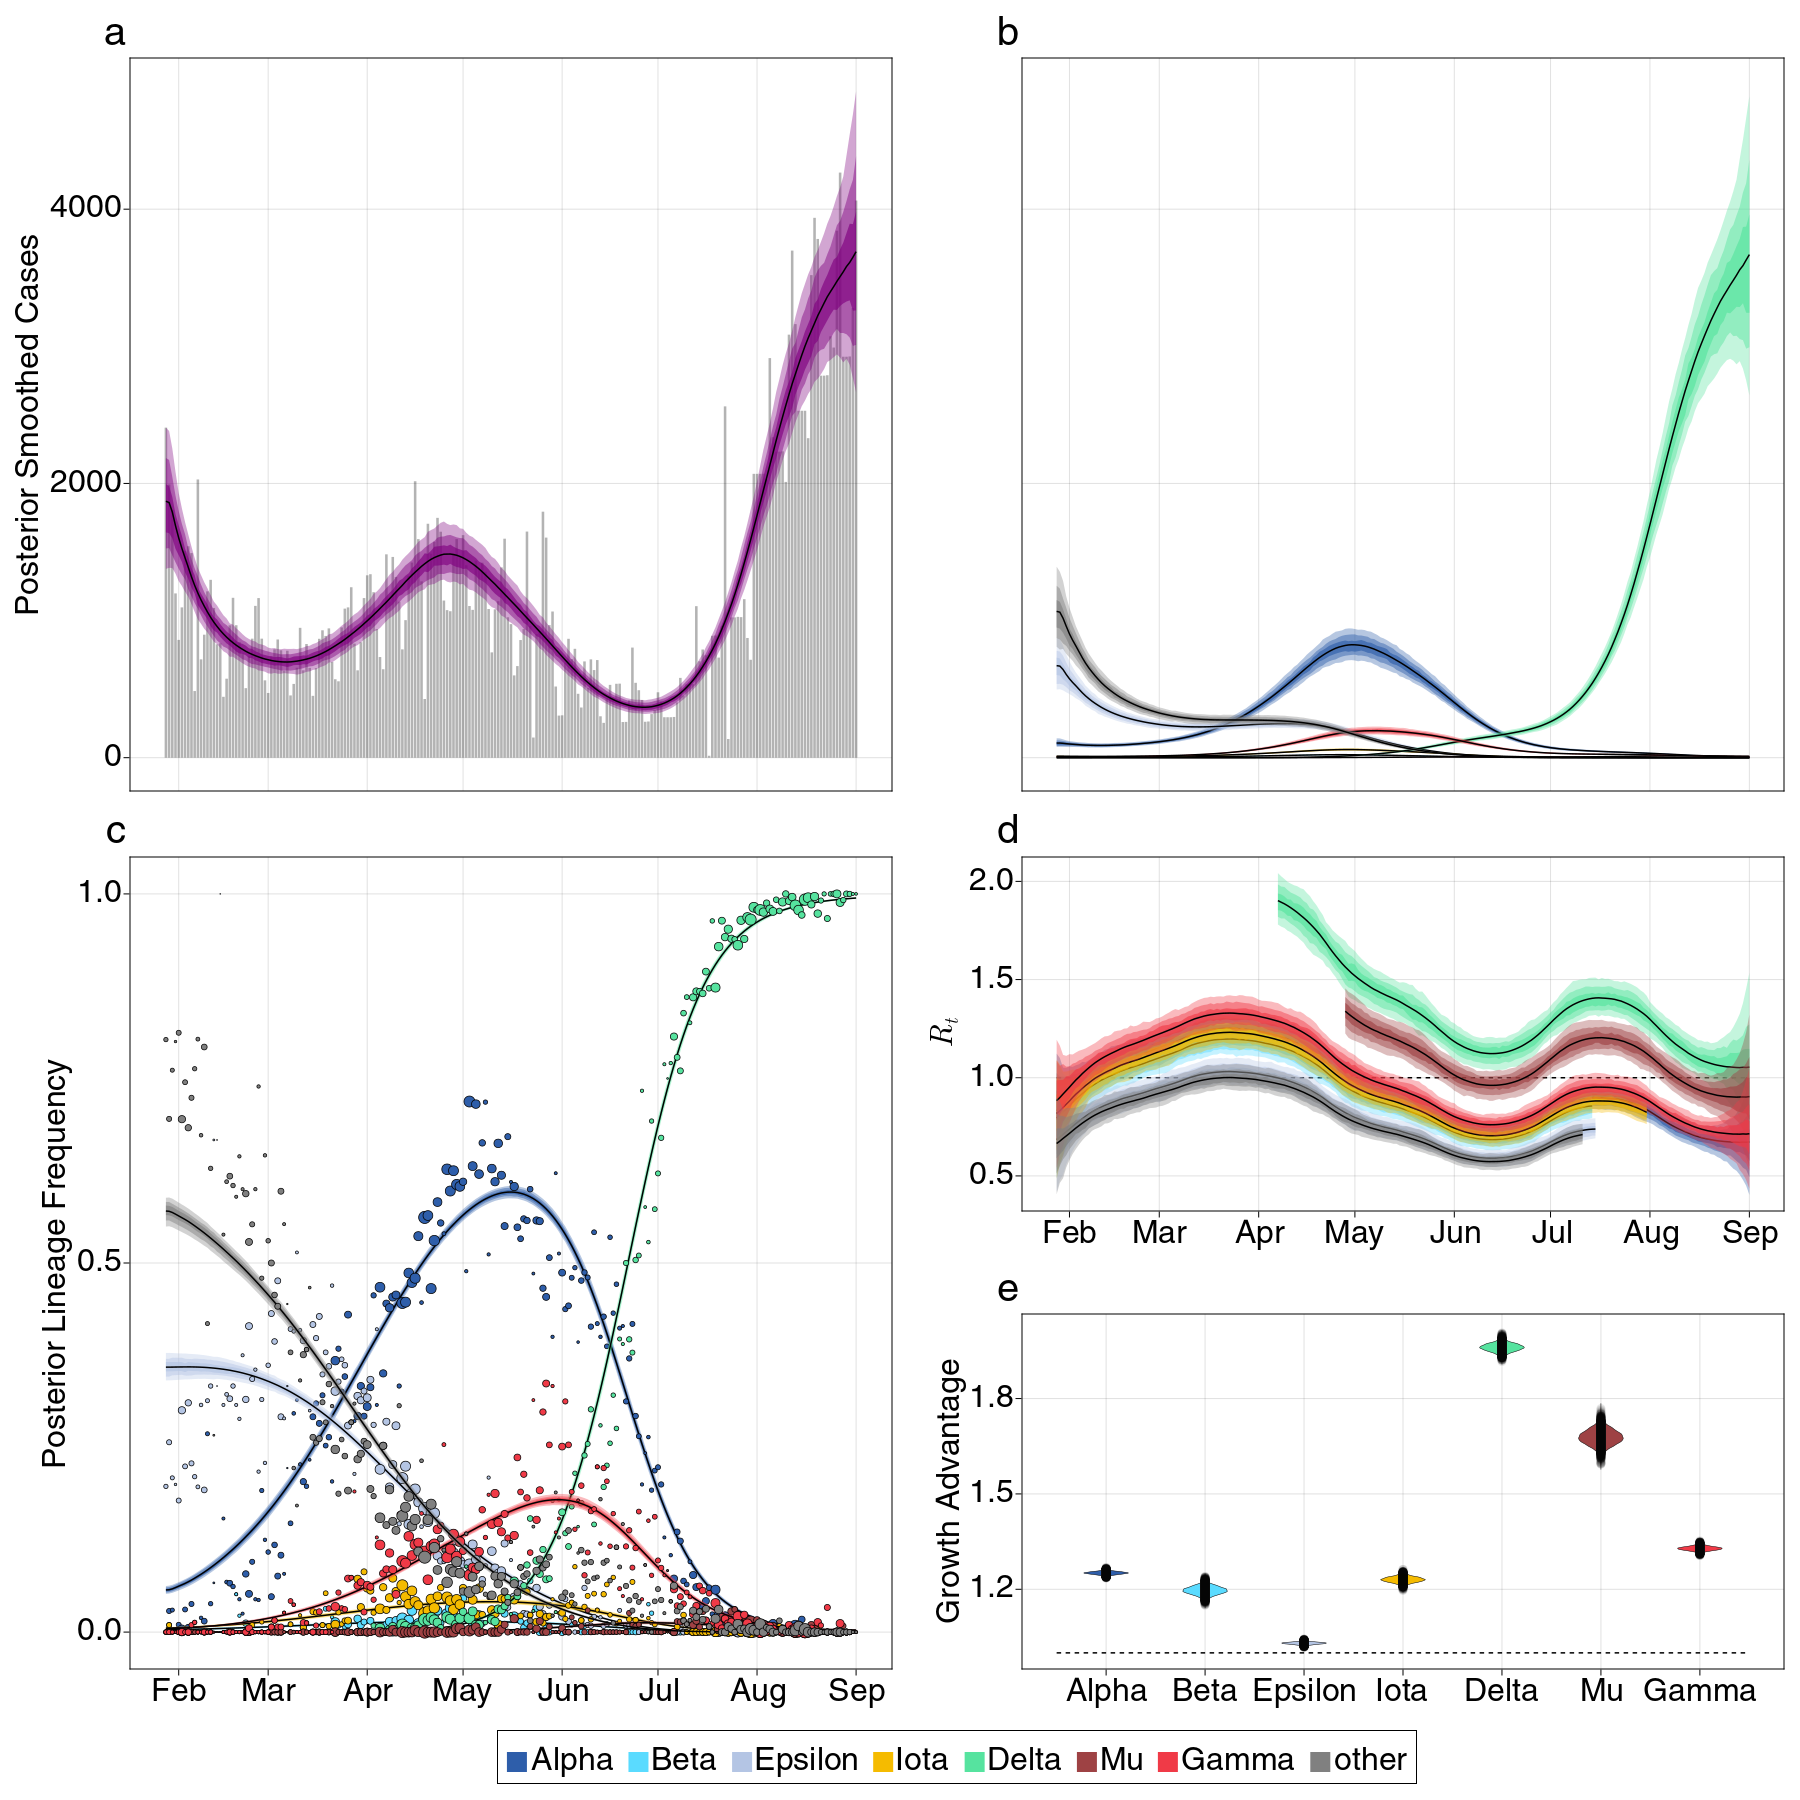

In [24]:
fig_2_A = make_fig_2_HDI("Washington", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


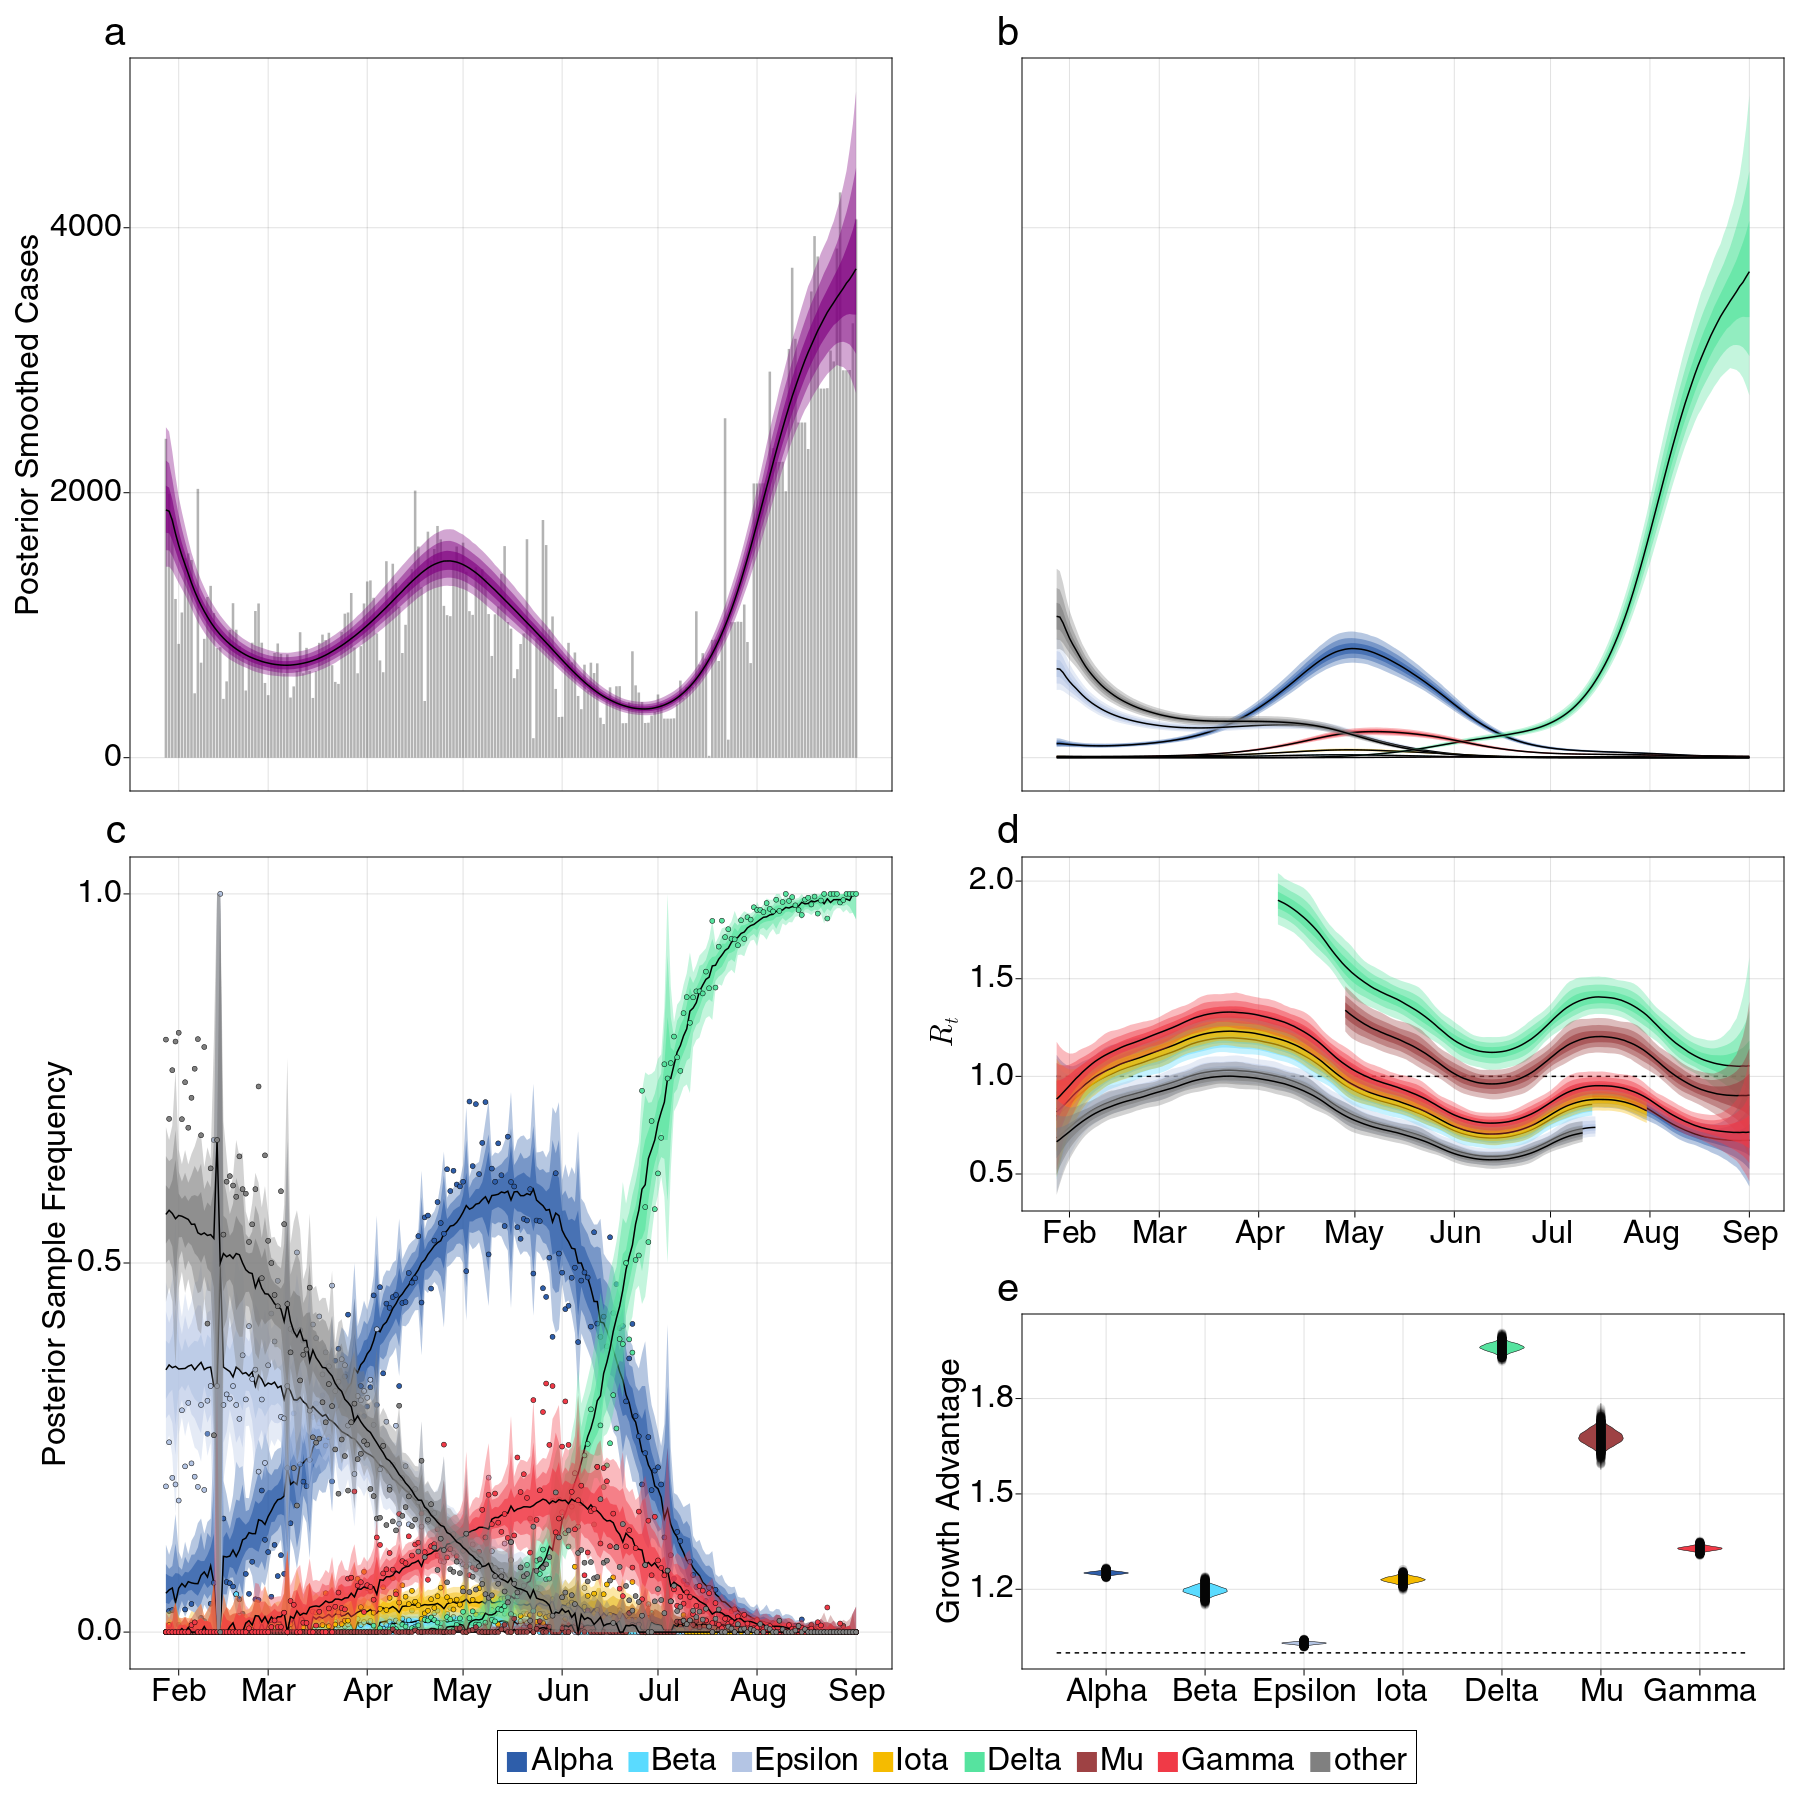

In [56]:
fig_2_B = make_fig_2("Washington", states_dict, true)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


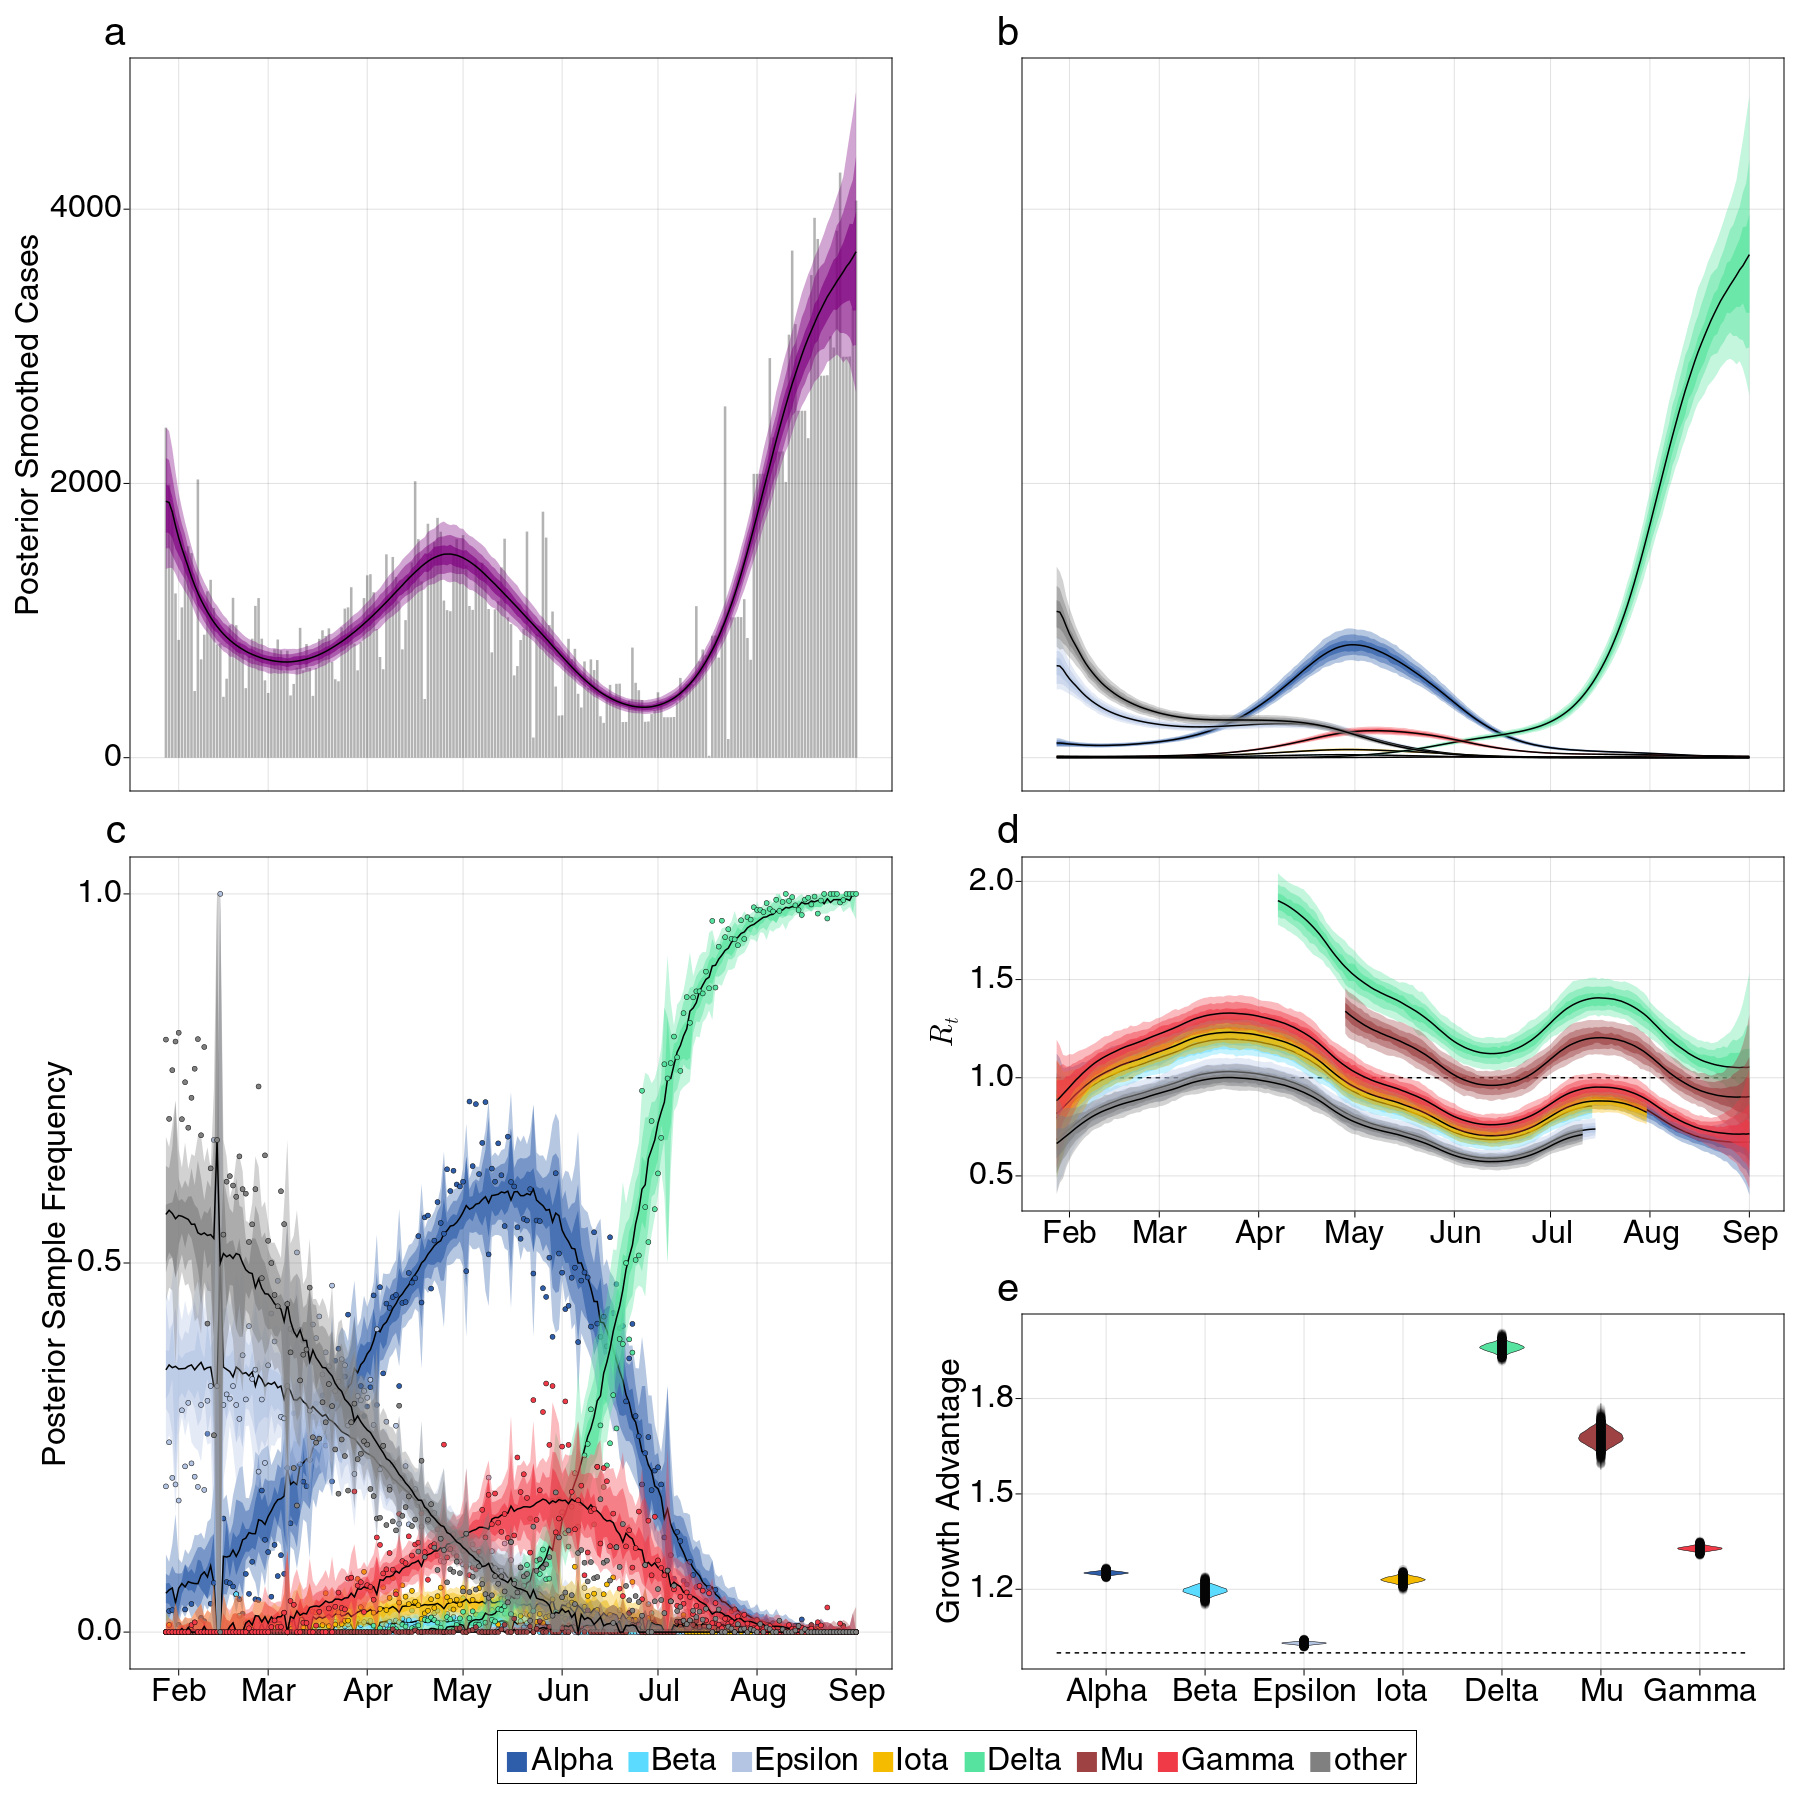

In [23]:
fig_2_B = make_fig_2_HDI("Washington", states_dict, true)

In [ ]:
save("../manuscript/figs/fig_2_version_A.png", fig_2_A)
save("../manuscript/figs/fig_2_version_B.png", fig_2_B)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


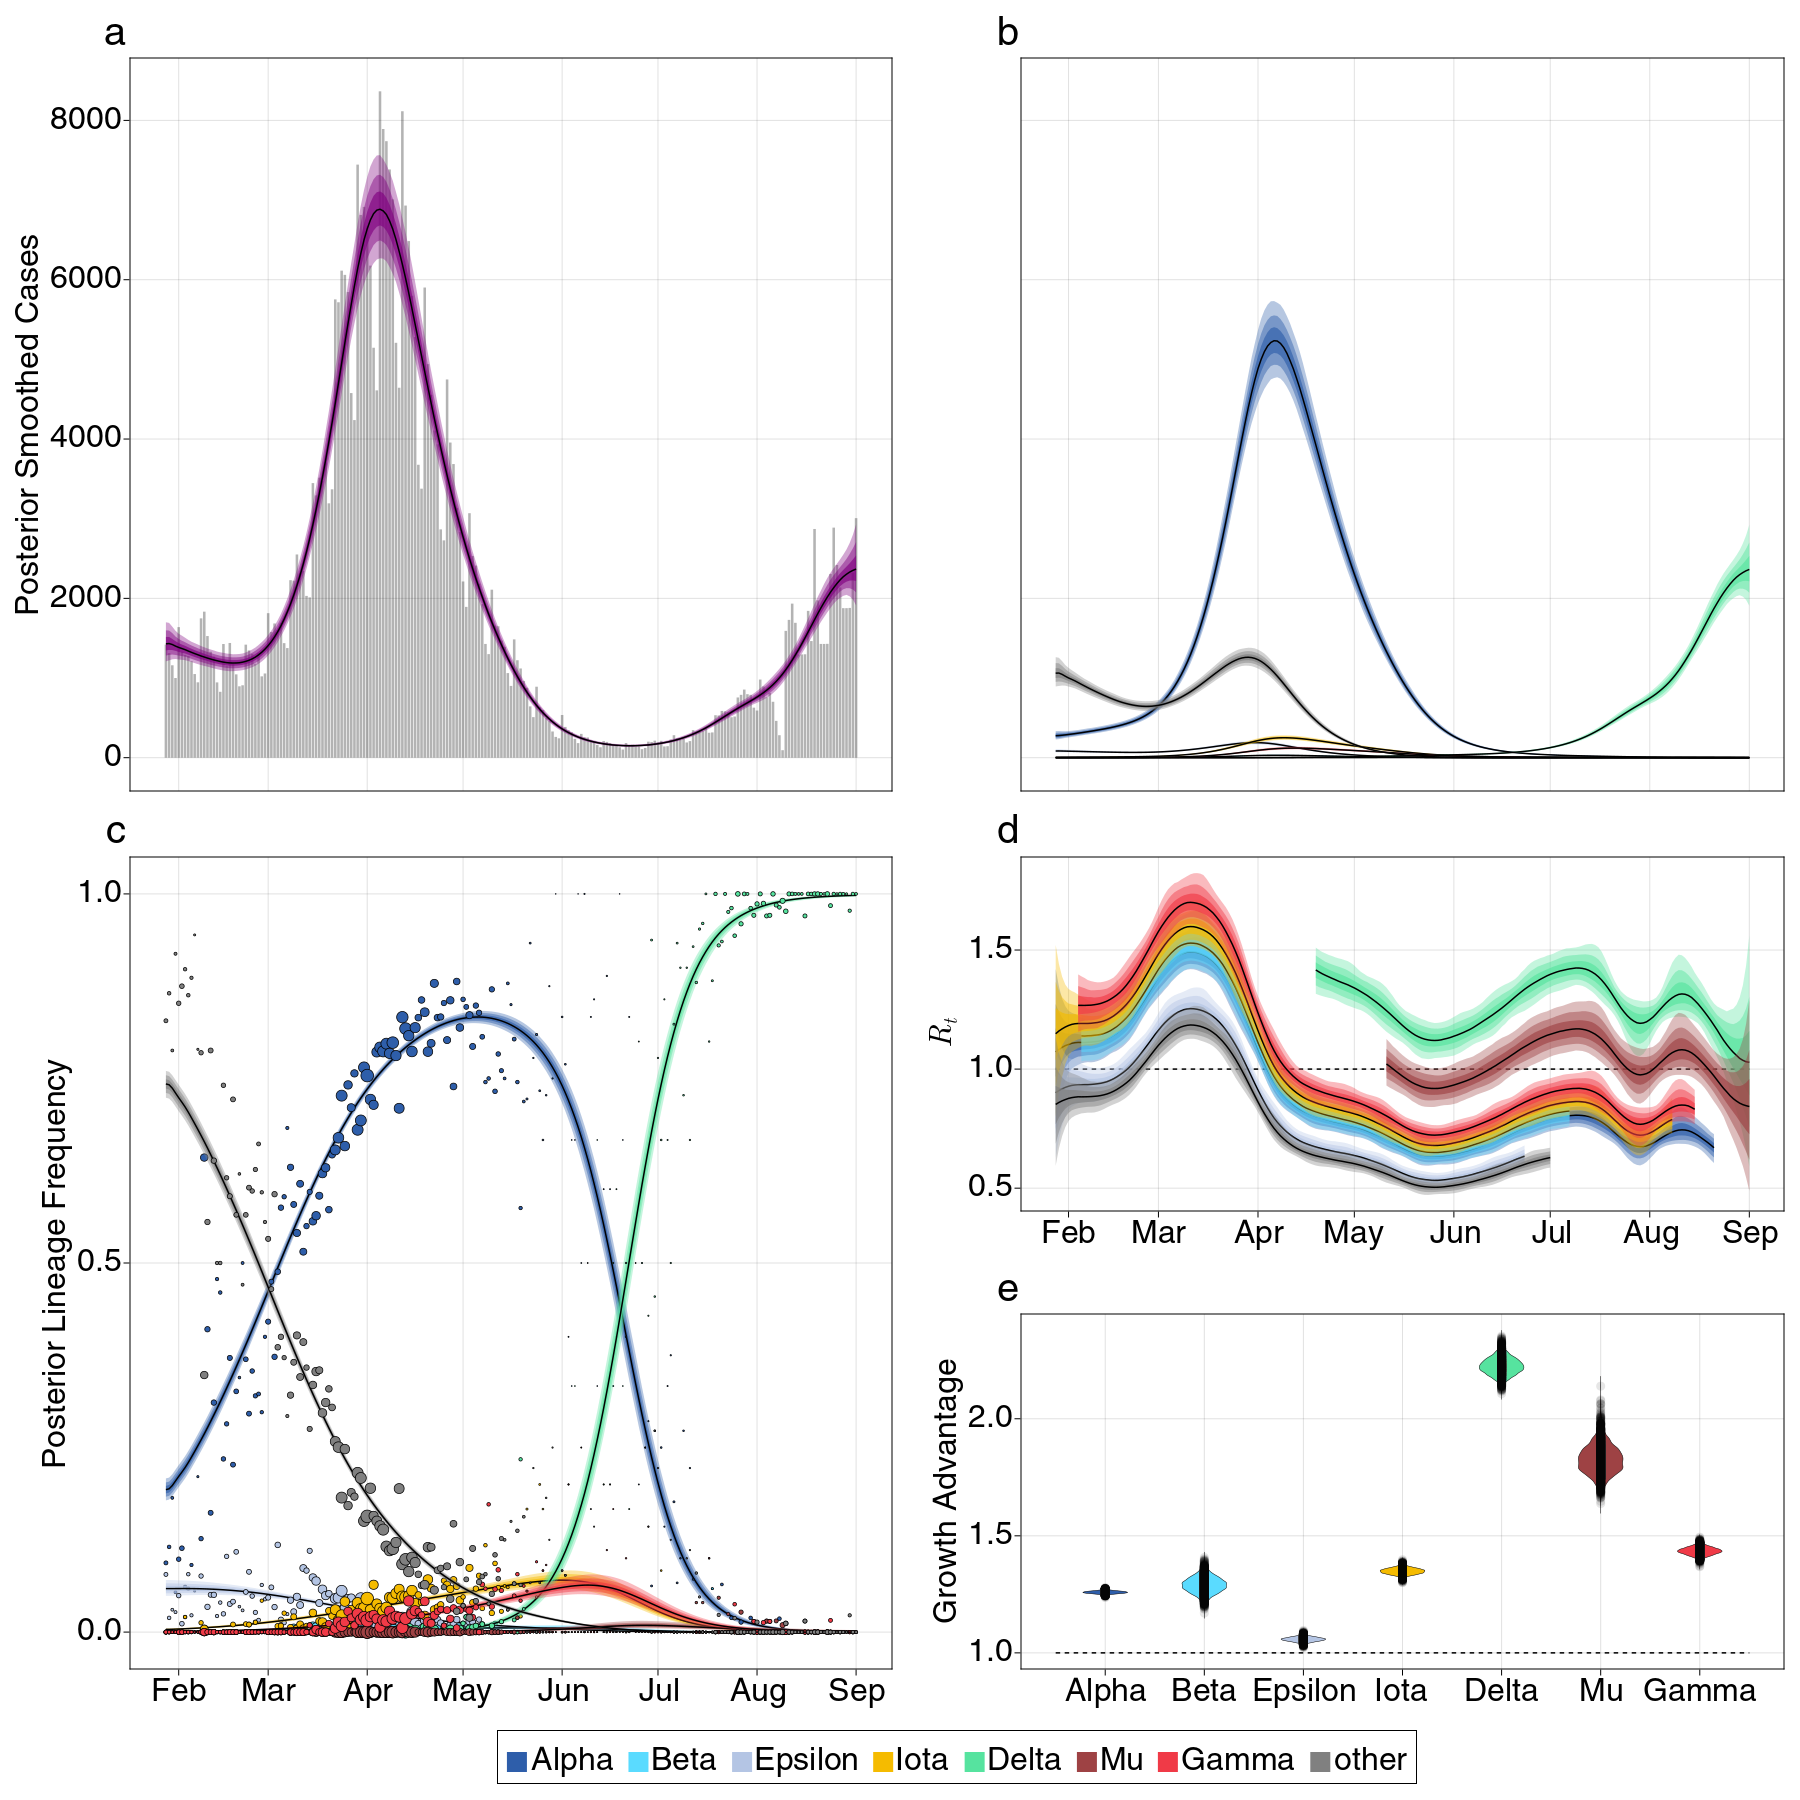

In [57]:
make_fig_2("Michigan", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


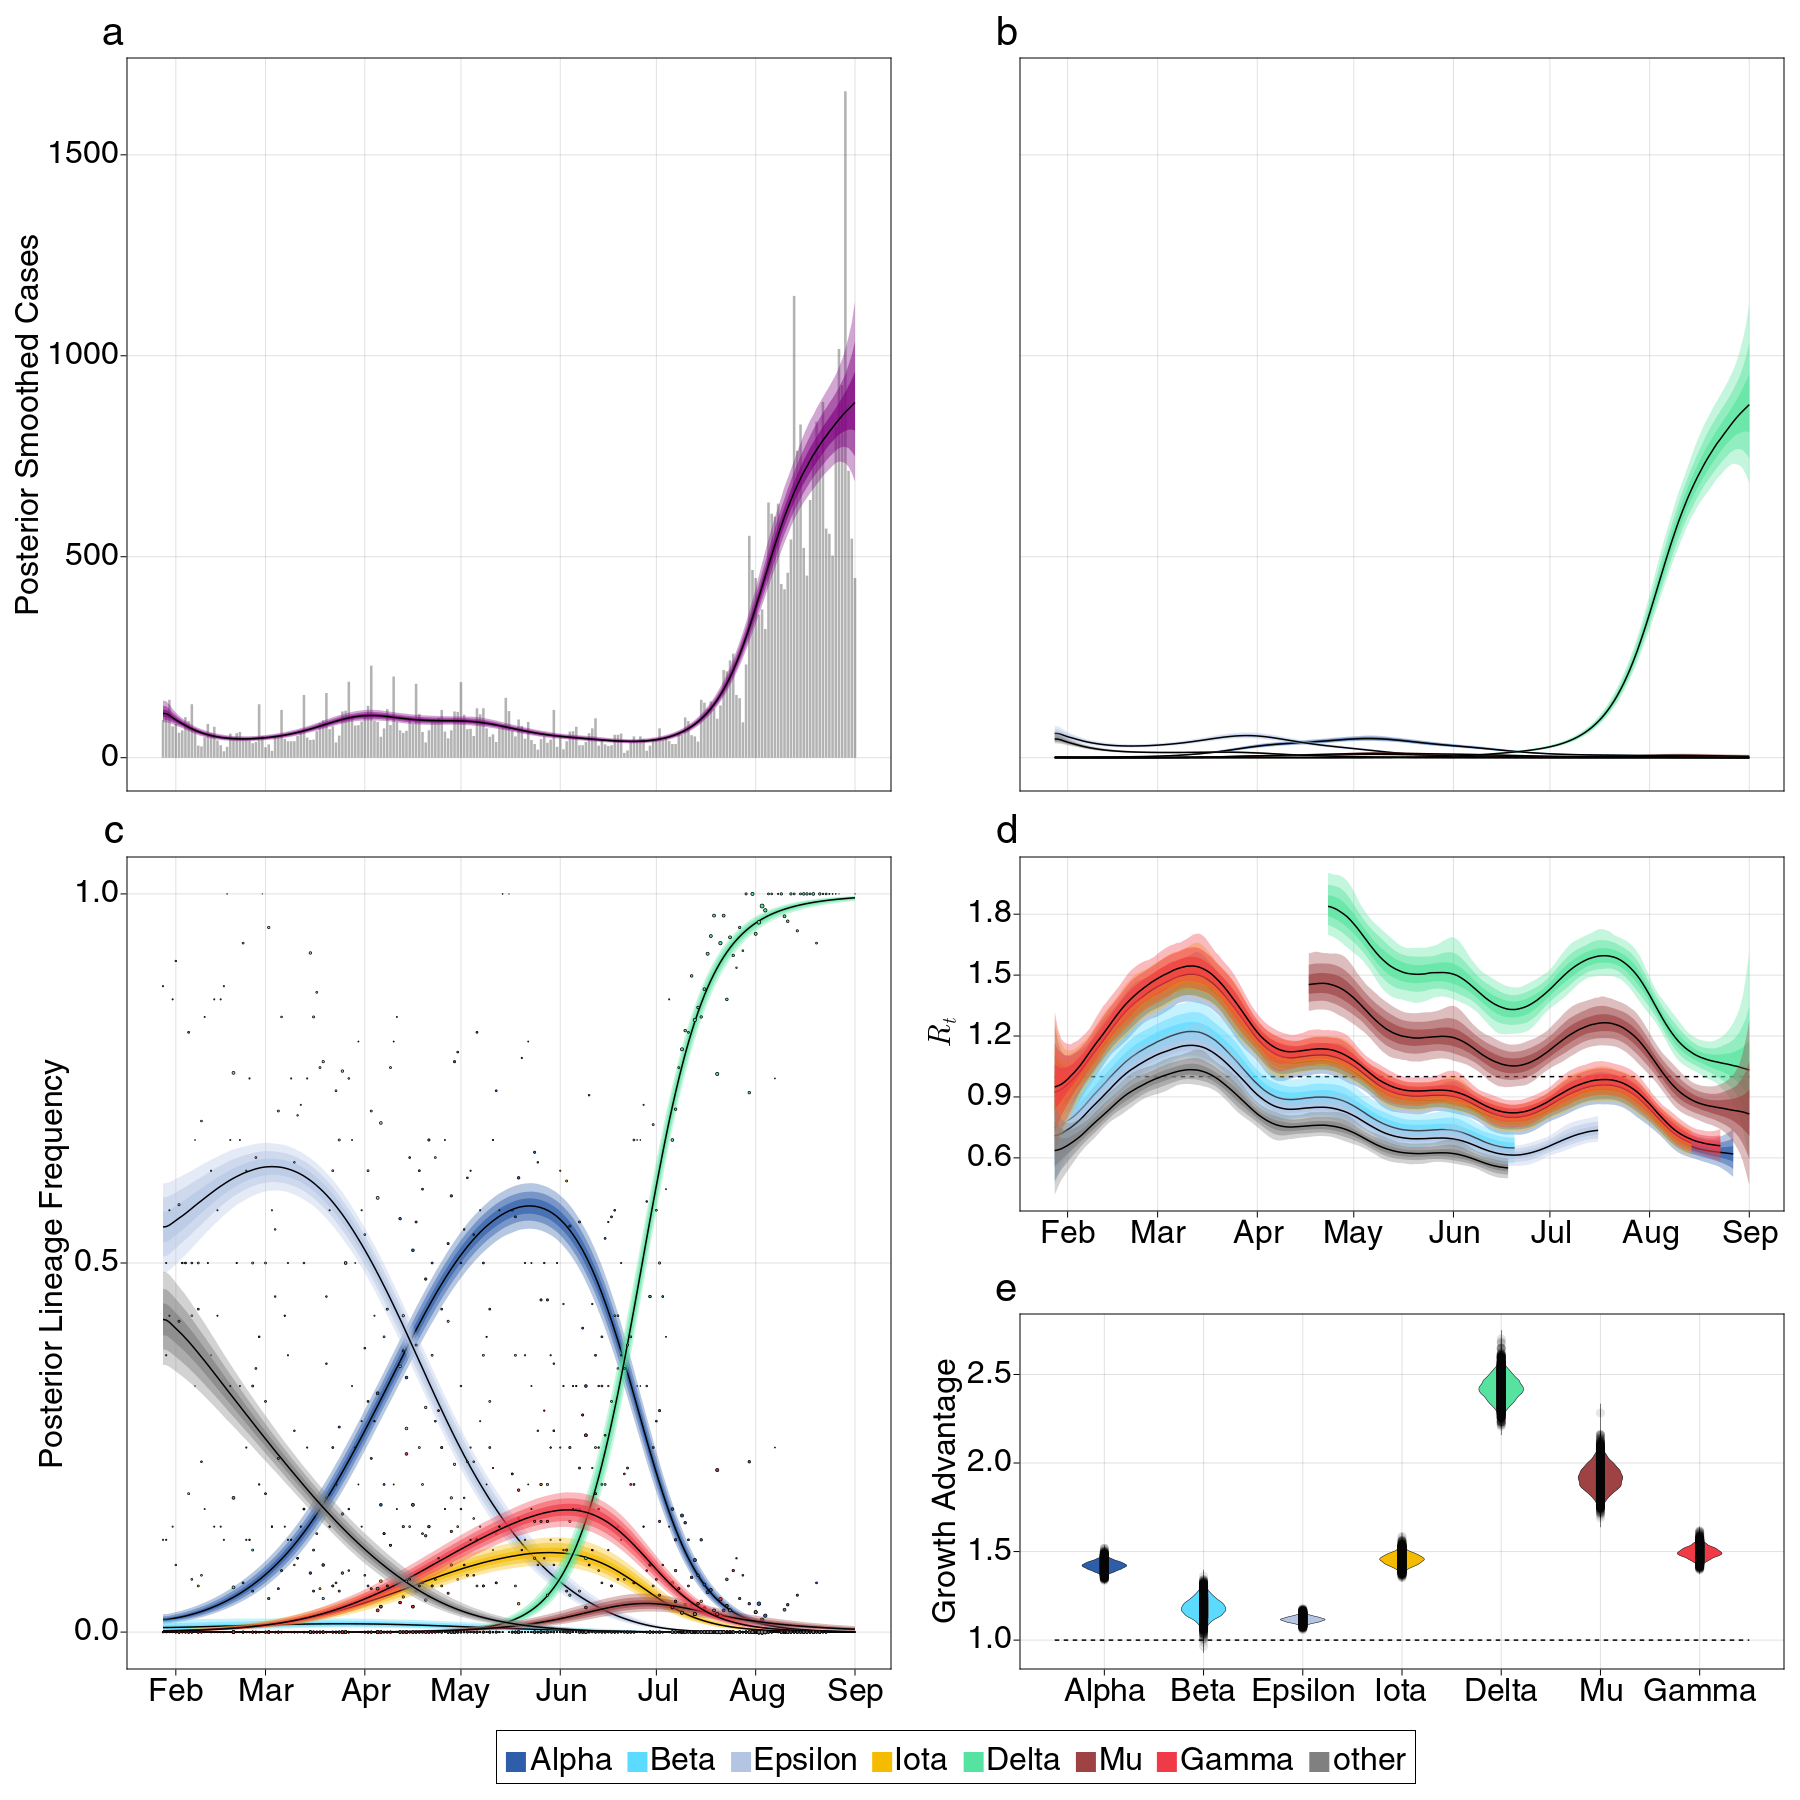

In [58]:
make_fig_2("Hawaii", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


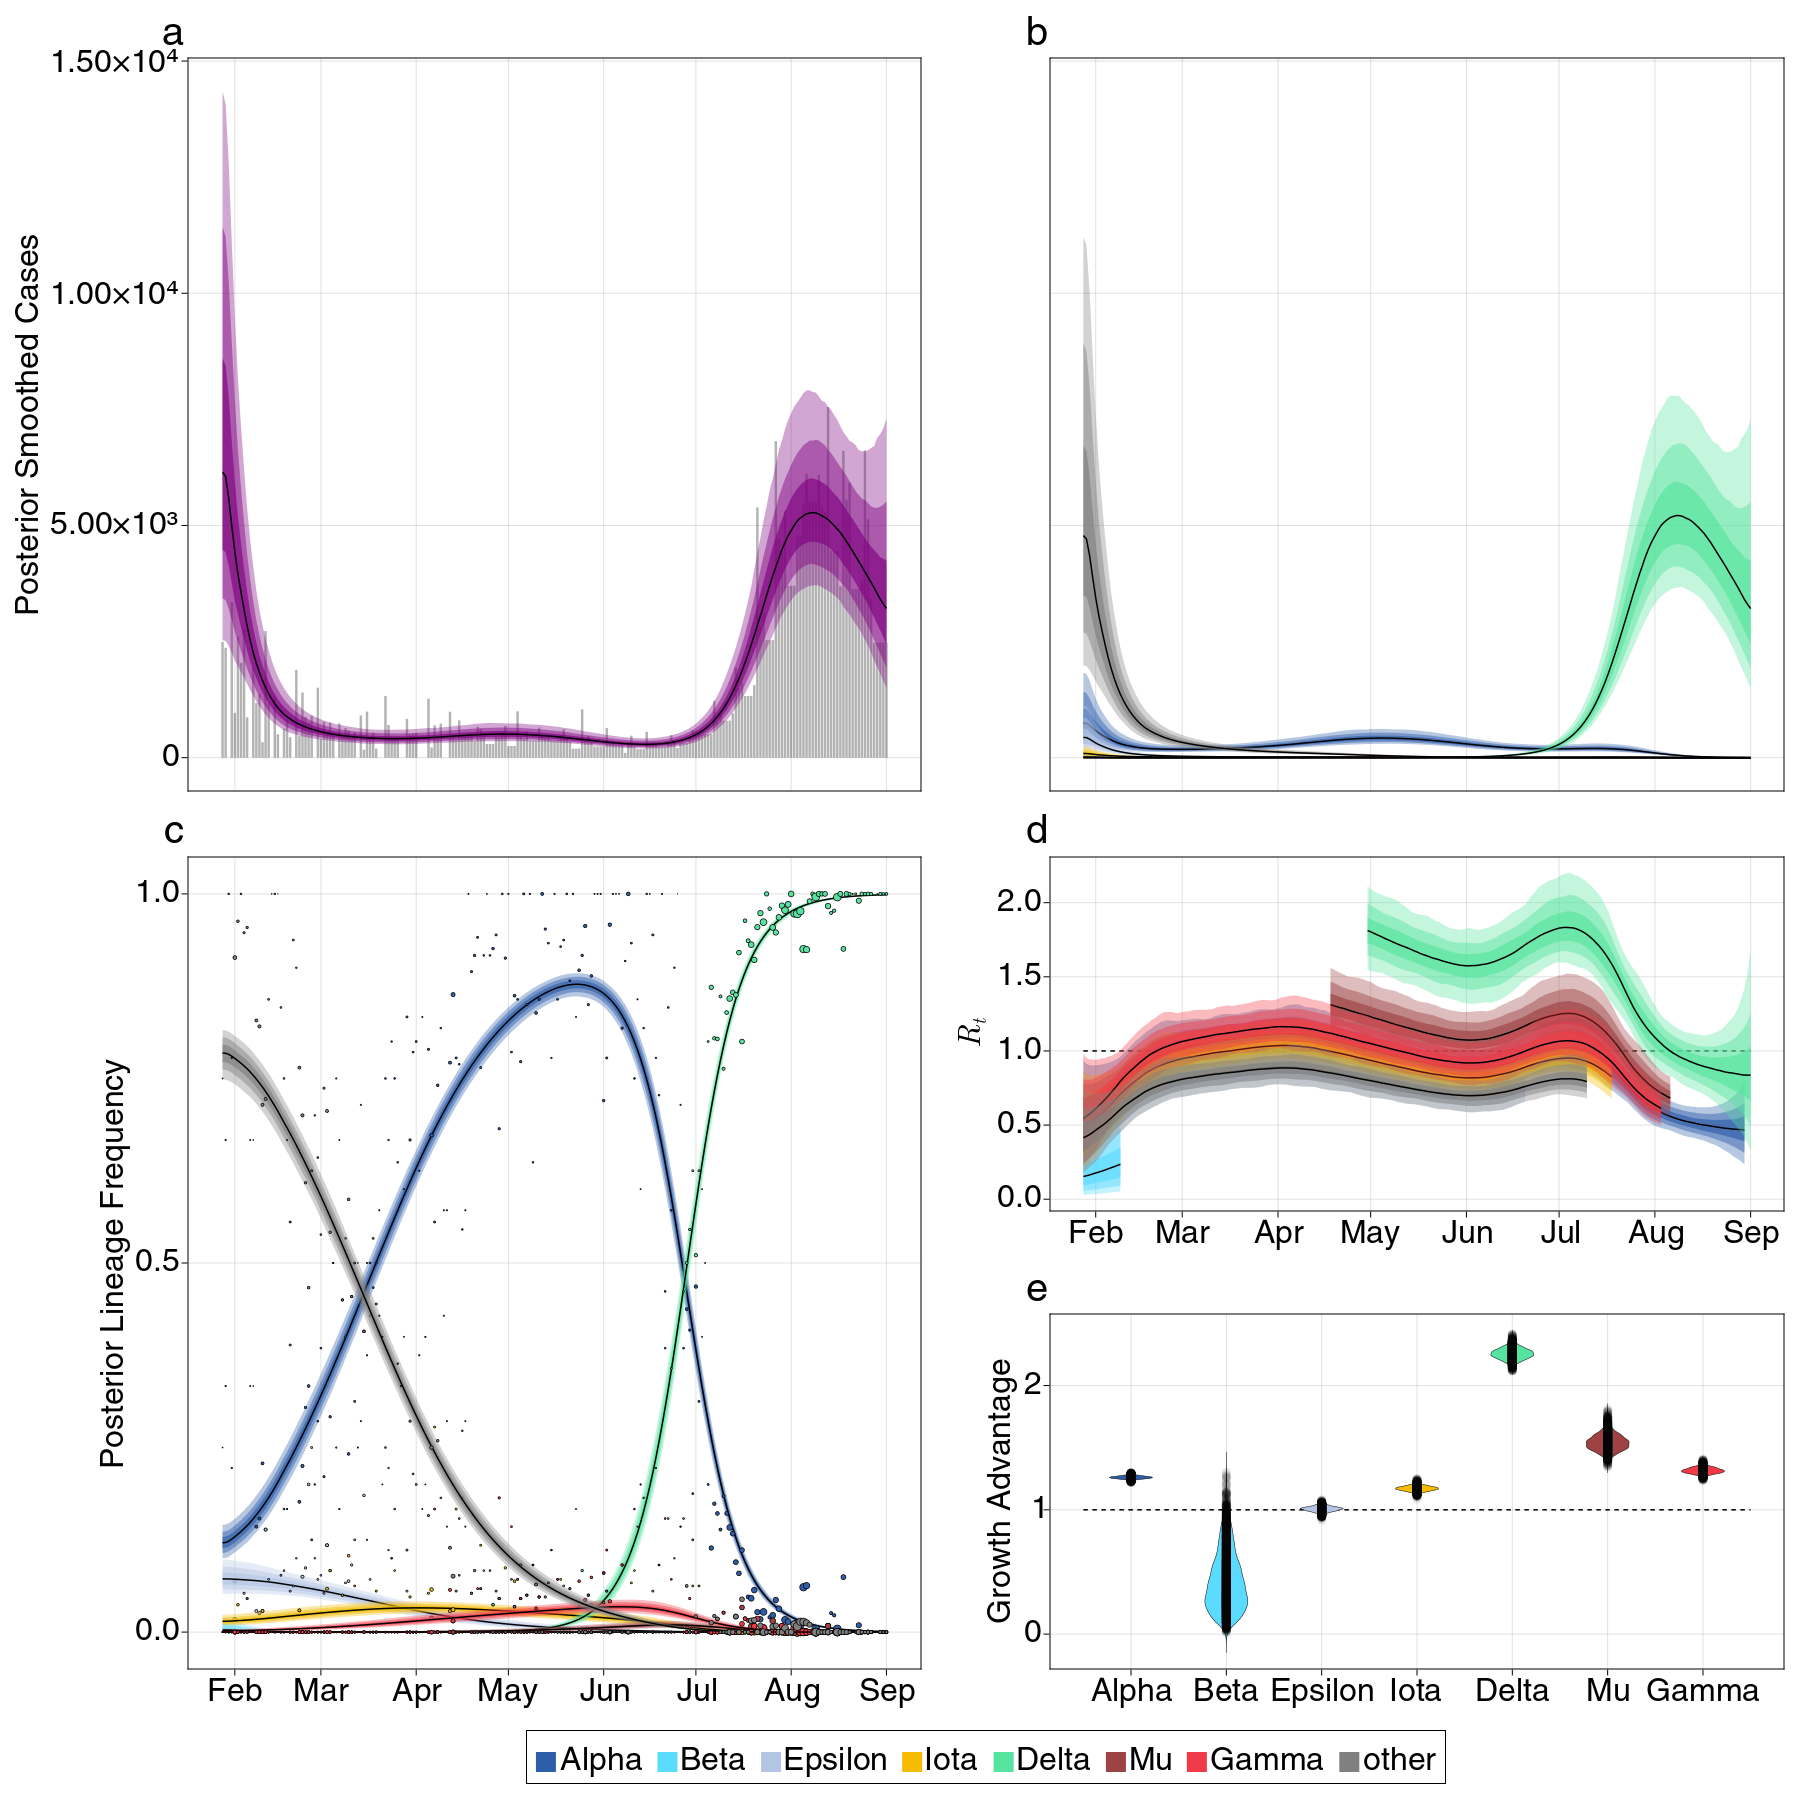

In [59]:
make_fig_2("Louisiana", states_dict, false)

In [ ]:
fig_2S_NY = make_fig_2("New_York", states_dict, false)

In [ ]:
save("../manuscript/figs/fig_2S_NY.png", fig_2S_NY)

## Figure 3: Looking across all states

In [146]:
growth_df = CSV.read("../data/sims/results/09_23_21/inferred_lineage_growth_advantage_09_23_2021.tsv", DataFrame)

322×7 DataFrame
 Row │ state      lineage    v_median  v_lower_50  v_upper_50  v_lower_80  v_u ⋯
     │ String     String     Float64   Float64     Float64     Float64     Flo ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Alabama    B.1.1.7    1.17316     1.16635     1.18088     1.15954     1 ⋯
   2 │ Alabama    B.1.351    0.914904    0.838088    0.985724    0.764033    1
   3 │ Alabama    B.1.427    1.00676     0.987669    1.0261      0.969599    1
   4 │ Alabama    B.1.526    1.12931     1.11326     1.14494     1.09953     1
   5 │ Alabama    B.1.617.2  1.84802     1.82658     1.86948     1.80703     1 ⋯
   6 │ Alabama    B.1.621    1.36778     1.33952     1.39811     1.31556     1
   7 │ Alabama    P.1        1.26931     1.25481     1.284       1.24272     1
   8 │ Alaska     B.1.1.7    1.26408     1.2534      1.2749      1.24338     1
   9 │ Alaska     B.1.351    1.07176     1.02904     1.11712     0.995084    1 ⋯
  10 │ Alaska     B.1.427    0.928201    0.919529    0.936891    0.911863    0
  11 │ Alaska     B.1.526    1.1968      1.16616     1.22669     1.14168     1
  ⋮  │     ⋮          ⋮         ⋮          ⋮           ⋮           ⋮           ⋱
 313 │ Wisconsin  B.1.617.2  2.405       2.38086     2.42988     2.35776     2
 314 │ Wisconsin  B.1.621    1.89611     1.86793     1.92656     1.84303     1 ⋯
 315 │ Wisconsin  P.1        1.51688     1.50392     1.52952     1.49332     1
 316 │ Wyoming    B.1.1.7    1.10462     1.10046     1.10873     1.0967      1
 317 │ Wyoming    B.1.351    0.37985     0.239867    0.559969    0.151456    0
 318 │ Wyoming    B.1.427    0.94391     0.938726    0.948837    0.933954    0 ⋯
 319 │ Wyoming    B.1.526    1.07031     1.0633      1.07785     1.05673     1
 320 │ Wyoming    B.1.617.2  1.52193     1.51036     1.53375     1.50101     1
 321 │ Wyoming    B.1.621    1.21968     1.192       1.24861     1.16858     1
 322 │ Wyoming    P.1        1.14877     1.13732     1.15969     1.12761     1 ⋯
                                                   1 column and 301 rows omitted

In [147]:
state_names = sort(unique(growth_df.state))
clean_state_names = replace.(state_names, "_" => " ")

46-element Vector{String}:
 "Alabama"
 "Alaska"
 "Arizona"
 "Arkansas"
 "California"
 "Colorado"
 "Connecticut"
 "Florida"
 "Georgia"
 "Hawaii"
 "Idaho"
 "Illinois"
 "Indiana"
 ⋮
 "Pennsylvania"
 "Rhode Island"
 "South Carolina"
 "Tennessee"
 "Texas"
 "Utah"
 "Vermont"
 "Virginia"
 "Washington"
 "West Virginia"
 "Wisconsin"
 "Wyoming"

In [148]:
states_to_ordering(state) = findfirst(s -> s==state, state_names)

states_to_ordering (generic function with 1 method)

In [197]:
function make_figure_3(growth_df)
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (2400, 2000), fontsize = 36, font = "Helvetica")
    g_growth_all = fig[1:3, 1] = GridLayout()
    ax_growth_all = Axis(g_growth_all[1,1],xlabel = "Inferred Growth Advantage")
    
    # Redefine seq_labels with unique names in the thingy?
    seq_labels = unique(growth_df.lineage)
    lineage_map = get_sequence_map(seq_labels)
    WHO_seq_names = [lineage_to_WHO[lineage] for lineage in seq_labels]

    # Start Plot
    vlines!(ax_growth_all, [1.], color = :black, linewidth = 2.5, linestyle = :dash)
    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        this_lineage = filter(row -> row.lineage == name, growth_df)
    
        # Plot 80_CI
        rangebars!(ax_growth_all, 
            states_to_ordering.(this_lineage.state), 
            this_lineage.v_lower_80, 
            this_lineage.v_upper_80,
            direction = :x, 
            color = (this_color, 1.0),
            linewidth = 4)
    
        # Plot 50_CI
        rangebars!(ax_growth_all, 
            states_to_ordering.(this_lineage.state), 
            this_lineage.v_lower_50, 
            this_lineage.v_upper_50,
            direction = :x,
            color = (this_color, 1.0),
            linewidth = 6)
    end

    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        this_lineage = filter(row -> row.lineage == name, growth_df)
    
        # Plot median
        scatter!(ax_growth_all, 
            this_lineage.v_median, 
            states_to_ordering.(this_lineage.state), 
            color = this_color,
            strokewidth = 3.5,
            markersize = 18.)
    end

    ax_growth_all.xticks = 0:0.5:3
    ax_growth_all.yticks = 1:length(state_names)
    ax_growth_all.ytickformat = ys -> clean_state_names[convert.(Int,ys)]
    ax_growth_all.yreversed = true

    # Growth Advantage medians
    g_growth_meds = fig[1, 2] = GridLayout()
    ax_growth_meds = Axis(g_growth_meds[1,1],ylabel = "Median Growth Advantage")

    hlines!(ax_growth_meds, [1.], color = :black, linewidth = 2.5, linestyle = :dash)
    lineage_nums = [lineage_map[lin] for lin in growth_df.lineage]
    lineage_cols = [lineage_colors[lin] for lin in lineage_nums]

    violin!(ax_growth_meds, lineage_nums, growth_df.v_median, 
        datalimits = extrema, 
        color = lineage_cols,
        orientation = :horizontal,
        strokewidth = 1.5)

    scatter!(ax_growth_meds, lineage_nums, growth_df.v_median, 
        color = lineage_cols,
        strokewidth = 2.5)

    ax_growth_meds.xticks = 1:length(seq_labels)
    ax_growth_meds.xtickformat = xs -> WHO_seq_names[convert.(Int,xs)]

    # Adding legend
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[2,2] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)

    for (label, layout) in zip(["(a)", "(b)"], [g_growth_all, g_growth_meds])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 60,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    fig 
end

make_figure_3 (generic function with 1 method)

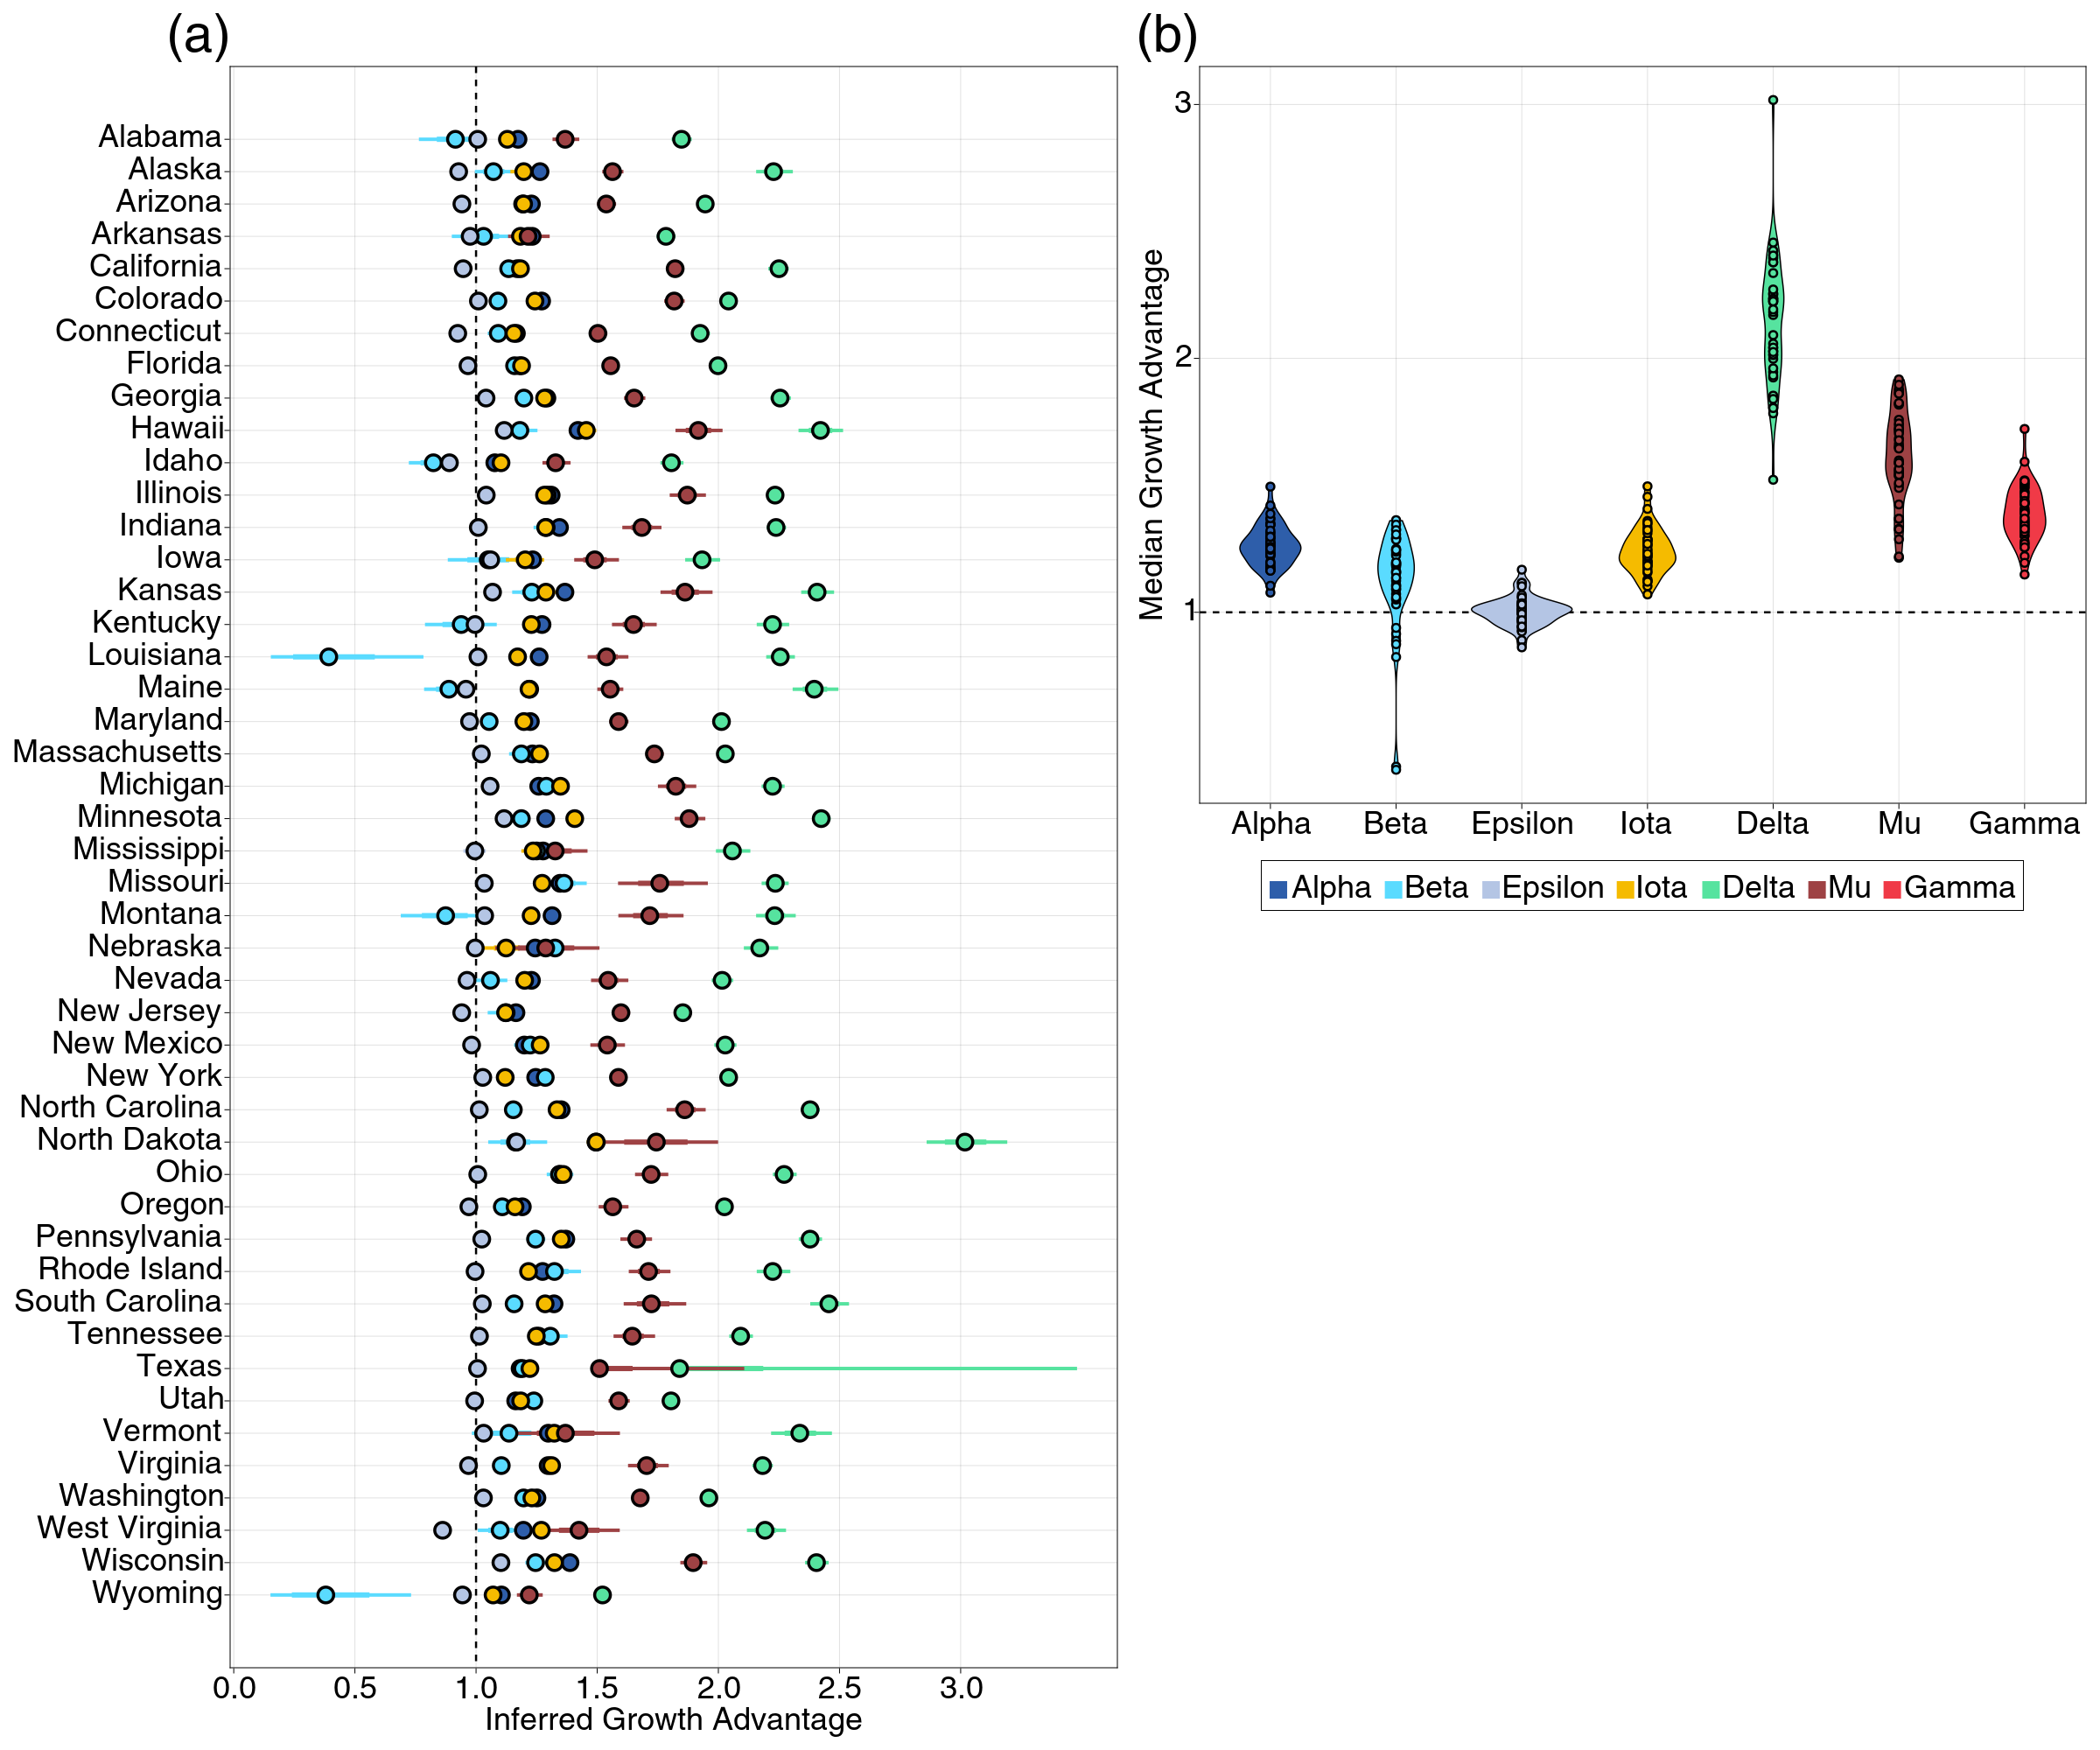

In [198]:
fig_3 = make_figure_3(growth_df)
fig_3

In [199]:
save("../manuscript/figs/fig_3_growth_advantages.png", fig_3)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007fb777fc4d80, 2400.0, 2000.0)


## Figure 4: Vaccination Histograms

In [7]:
vaccination_effects = CSV.read("../data/sims/results/09_23_21/vaccination-effects.tsv", DataFrame)

360×5 DataFrame
 Row │ state      lineage    effect             estimate   lineage_WHO 
     │ String     String     String             Float64    String      
─────┼─────────────────────────────────────────────────────────────────
   1 │ Alabama    other      vaccination_slope  -0.192832  other
   2 │ Alabama    B.1.1.7    vaccination_slope  -0.317717  Alpha
   3 │ Alabama    B.1.351    vaccination_slope  -0.22507   Beta
   4 │ Alabama    B.1.427    vaccination_slope  -0.231852  Epsilon
   5 │ Alabama    B.1.526    vaccination_slope  -0.258644  Iota
   6 │ Alabama    B.1.617.2  vaccination_slope  -0.50596   Delta
   7 │ Alabama    B.1.621    vaccination_slope  -0.232854  Mu
   8 │ Alabama    P.1        vaccination_slope  -0.36491   Gamma
   9 │ Alaska     other      vaccination_slope  -0.691214  other
  10 │ Alaska     B.1.1.7    vaccination_slope  -0.816099  Alpha
  11 │ Alaska     B.1.351    vaccination_slope  -0.723452  Beta
  ⋮  │     ⋮          ⋮              ⋮              ⋮           ⋮
 351 │ Wisconsin  B.1.621    vaccination_slope  -0.660989  Mu
 352 │ Wisconsin  P.1        vaccination_slope  -0.793044  Gamma
 353 │ Wyoming    other      vaccination_slope  -0.225125  other
 354 │ Wyoming    B.1.1.7    vaccination_slope  -0.35001   Alpha
 355 │ Wyoming    B.1.351    vaccination_slope  -0.257363  Beta
 356 │ Wyoming    B.1.427    vaccination_slope  -0.264145  Epsilon
 357 │ Wyoming    B.1.526    vaccination_slope  -0.290937  Iota
 358 │ Wyoming    B.1.617.2  vaccination_slope  -0.538253  Delta
 359 │ Wyoming    B.1.621    vaccination_slope  -0.265147  Mu
 360 │ Wyoming    P.1        vaccination_slope  -0.397203  Gamma
                                                       339 rows omitted

In [14]:
seq_labels = vcat(states_dict["Michigan"]["seq_labels"]...)
WHO_seq_names = [lineage_to_WHO[lin] for lin in seq_labels]
lineage_map = get_sequence_map(seq_labels)

Dict{Any, Any} with 8 entries:
  "B.1.526"   => 4
  "B.1.621"   => 6
  "P.1"       => 7
  "other"     => 8
  "B.1.1.7"   => 1
  "B.1.351"   => 2
  "B.1.617.2" => 5
  "B.1.427"   => 3

In [15]:
function make_figure_5(vacc, n_rows)
    lineages_WHO = unique(vacc.lineage_WHO)
    lineages = unique(vacc.lineage)
    N_lineage = length(lineages_WHO)
    
    # Initalize Number of Rows
    n_cols = div(N_lineage, n_rows)
    this_row = 1
    
    g_list = []
    ax_list = []
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (2000, 1000), fontsize = 36, font = "Helvetica")
    for lineage in 1:N_lineage
        this_col = mod(lineage-1, n_cols) + 1
        
        g = fig[this_row, this_col] = GridLayout()
        ax = Axis(g[1,1]) 
        
        push!(g_list, g)
        push!(ax_list, ax)
        
        # Add dashed line
        vlines!(ax, [0.0], linestyle = :dash, color = :black, linewidth = 5.0)
        
        # Filter to lineage of interest
        lineage_df = filter(row -> row.lineage == lineages[lineage], vacc)    
        this_color = lineage_colors[lineage_map[lineages[lineage]]]
        
        hist!(ax, lineage_df.estimate, color = this_color, normalization = :pdf)
        
        if this_row != n_rows
            hidexdecorations!(ax, grid = false)
        end
        
        if this_col != 1
            hideydecorations!(ax, grid = false) 
        end
         # If at the end of the row, add new one
        if mod(lineage, div(N_lineage, n_rows)) == 0
           this_row += 1 
        end
    end
    
    linkxaxes!(ax_list...)
    linkyaxes!(ax_list...)
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[n_rows+1,1:n_cols] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)
    fig
end

# xaxis, indicating which variant/lineage in each panel, legend

make_figure_5 (generic function with 1 method)

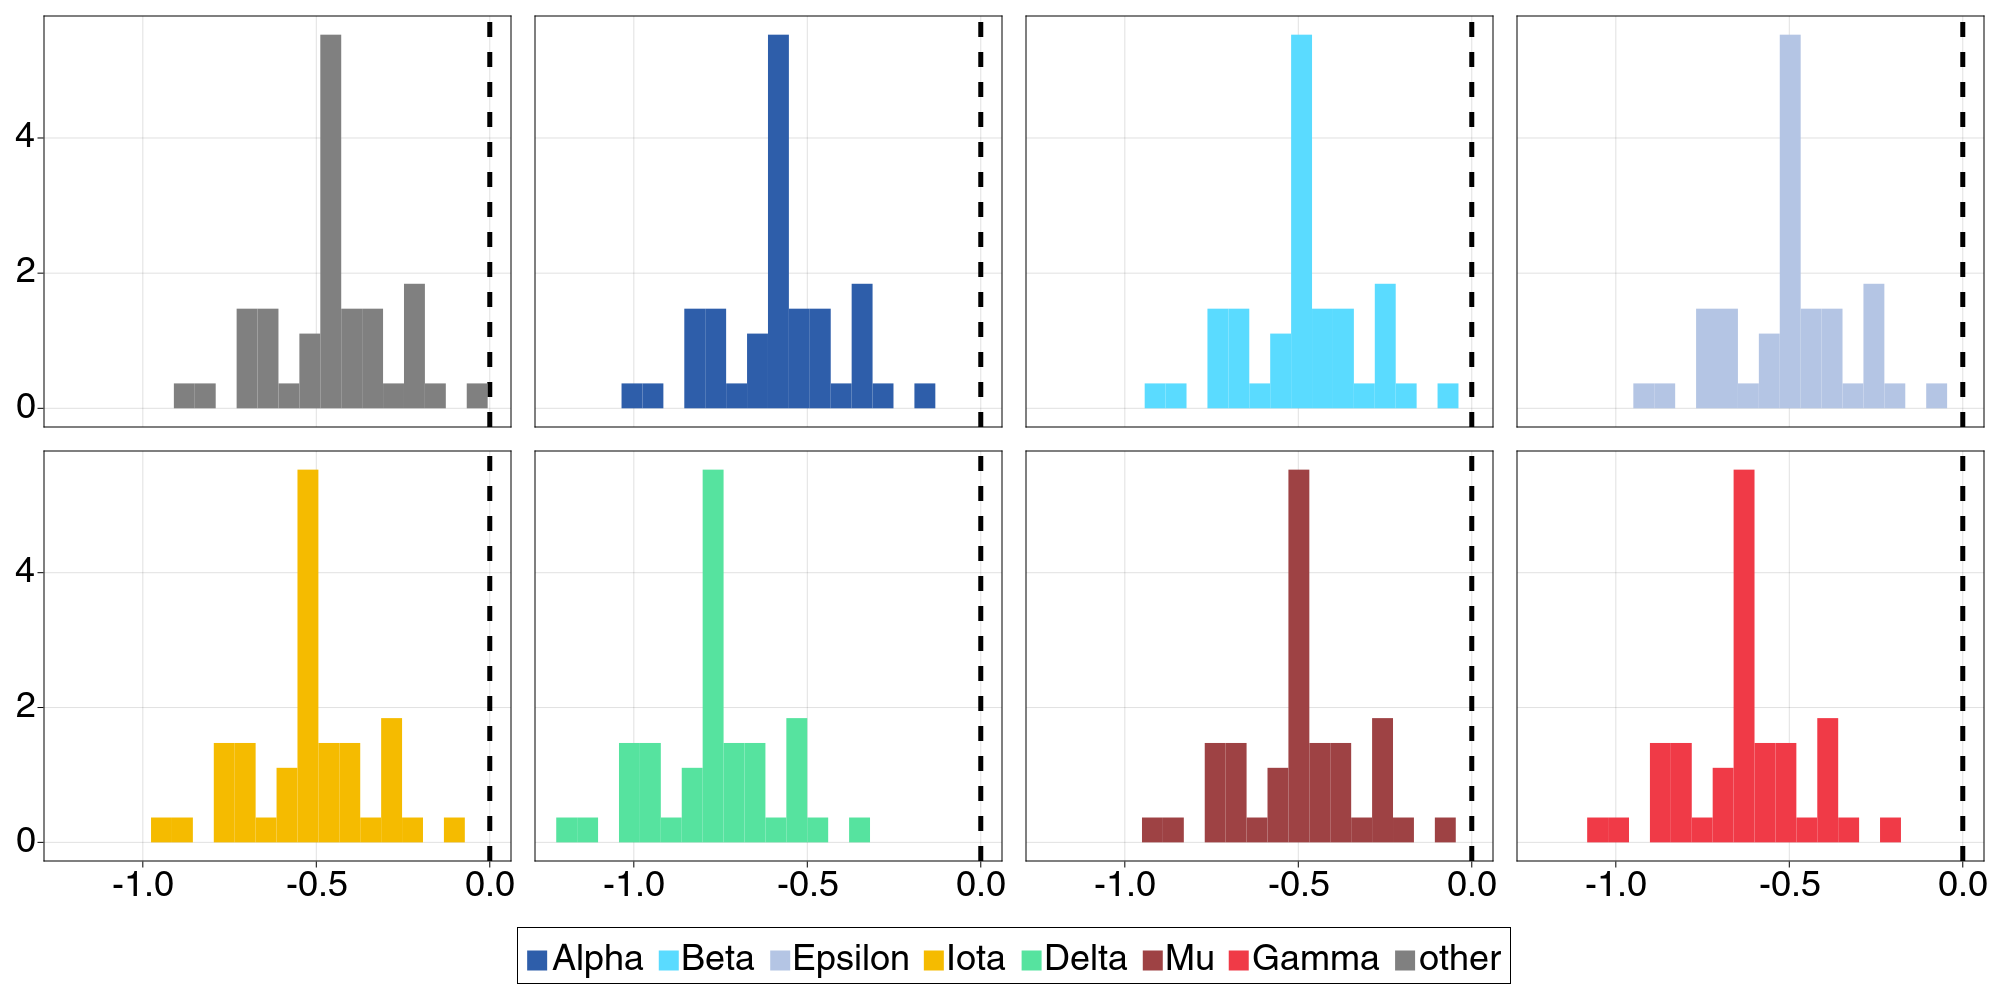

In [16]:
fig_5 = make_figure_5(vaccination_effects, 2)
fig_5

In [17]:
save("../manuscript/figs/fig_5_vaccination_effect.png",fig_5)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f8410657fb0, 2000.0, 1000.0)


## Figure 4: Consensus in Rt

In [18]:
rt_df = CSV.read("../data/sims/results/09_23_21/inferred_lineage_rts_09_23_2021.tsv", DataFrame)
filter!(row -> row.state != "California", rt_df)
rt_df.lineage_WHO = [lineage_to_WHO[lineage] for lineage in rt_df.lineage]
first(rt_df, 10)

10×12 DataFrame
 Row │ state   date        lineage  rt_median  rt_lower_50  rt_upper_50  rt_lo ⋯
     │ String  Date        String   Float64    Float64      Float64      Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Texas   2021-01-28  B.1.1.7   0.516239     0.426292     0.609683     0. ⋯
   2 │ Texas   2021-01-29  B.1.1.7   0.525425     0.442859     0.609366     0.
   3 │ Texas   2021-01-30  B.1.1.7   0.53763      0.459891     0.615761     0.
   4 │ Texas   2021-01-31  B.1.1.7   0.552356     0.480187     0.623376     0.
   5 │ Texas   2021-02-01  B.1.1.7   0.56853      0.505014     0.635539     0. ⋯
   6 │ Texas   2021-02-02  B.1.1.7   0.588669     0.530373     0.650239     0.
   7 │ Texas   2021-02-03  B.1.1.7   0.609617     0.556988     0.664921     0.
   8 │ Texas   2021-02-04  B.1.1.7   0.633225     0.585336     0.683547     0.
   9 │ Texas   2021-02-05  B.1.1.7   0.659811     0.614752     0.703309     0. ⋯
  10 │ Texas   2021-02-06  B.1.1.7   0.687044     0.646042     0.727174     0.
                                                               6 columns omitted

In [19]:
function find_date_idx(dates, unique_dates)
    return [findfirst(x -> x == day, unique_dates) for day in dates]
end

find_date_idx (generic function with 1 method)

In [21]:
function make_figure_4(rt, n_rows)    
    unique_dates = sort(unique(rt.date))
    lineages_WHO = unique(rt.lineage_WHO)
    lineages = unique(rt.lineage)
    N_lineage = length(lineages_WHO)
    
    # Initalize Number of Rows
    n_cols = div(N_lineage, n_rows)
    this_row = 1

    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (2400, 1200), fontsize = 36, font = "Helvetica")
    g_list = []
    ax_list = []
    for lineage in 1:N_lineage
        this_col = mod(lineage-1, n_cols) + 1
        
        g = fig[this_row, this_col] = GridLayout()
        ax = Axis(g[1,1]) 
        
        push!(g_list, g)
        push!(ax_list, ax)
        
        # Add dashed line
        hlines!(ax, [1.0], linestyle = :dash, color = :black)
        
        # Filter to lineage of interest
        lineage_df = filter(row -> row.lineage == lineages[lineage], rt)
        this_color = lineage_colors[lineage_map[lineages[lineage]]]
        
        # Plot each state independently
        for state_df in groupby(lineage_df, :state)
            date_num = find_date_idx(state_df.date, unique_dates)
            idx_freq = (state_df.freq_median .> 0.001)
            if any(idx_freq)
                band!(ax, date_num[idx_freq], state_df.rt_lower_80[idx_freq], state_df.rt_upper_80[idx_freq], color = (this_color, alphas[2]))
                band!(ax, date_num[idx_freq], state_df.rt_lower_50[idx_freq], state_df.rt_upper_50[idx_freq], color = (this_color, alphas[1]))
                lines!(ax, date_num[idx_freq], state_df.rt_median[idx_freq], color = :black)
            end
       end
        
        # If this is the last row
        if this_row == n_rows
            ticks, _ = get_nice_ticks(unique_dates)
            ax.xticks = ticks
            ax.xtickformat = xs -> Dates.monthabbr.(unique_dates[convert.(Int, xs)])
        else 
            hidexdecorations!(ax, grid = false)
        end
        
        ax.yticks = 0:0.5:3.
        ylims!(ax, 0, nothing)
        
        if this_col != 1
           hideydecorations!(ax, grid = false) 
        end
        
        # If at the end of the row, add new one
        if mod(lineage, div(N_lineage, n_rows)) == 0
           this_row += 1 
        end
    end 
    
    linkxaxes!(ax_list...)
    linkyaxes!(ax_list...)
    
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[n_rows+1,1:n_cols] = Legend(fig, elements, WHO_seq_names, "", 
        orientation = :horizontal, tellwidth = false, tellheight = true, fontsize=60)

    fig
end

make_figure_4 (generic function with 1 method)

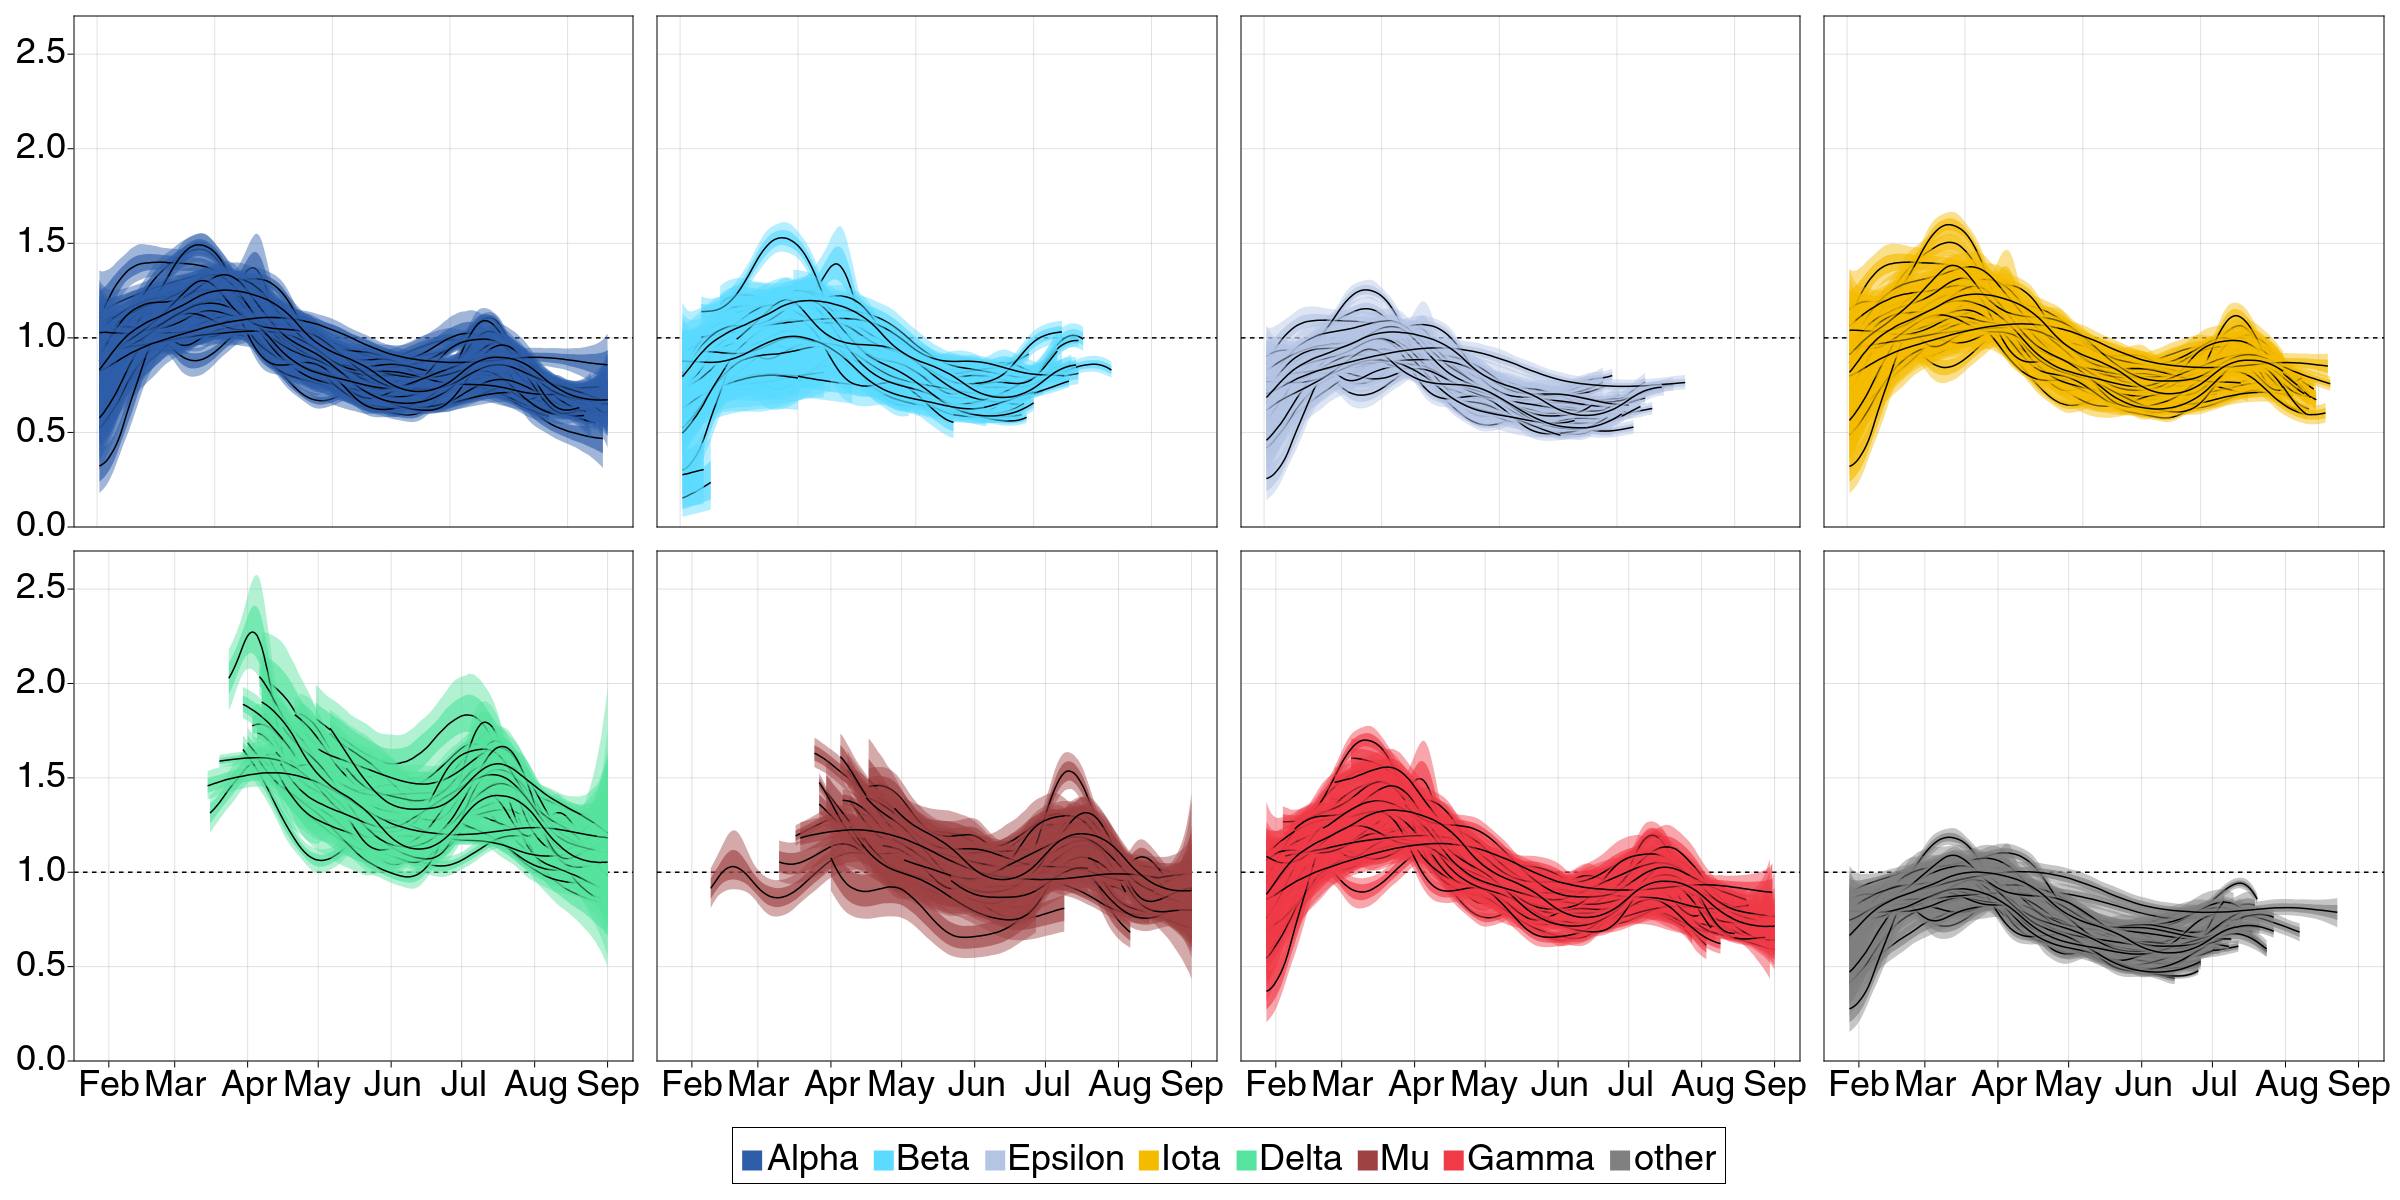

In [22]:
fig_4 = make_figure_4(rt_df, 2)
fig_4

In [23]:
save("../manuscript/figs/fig_4_rt_consensus.png",fig_5)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00007f8421013550, 2000.0, 1000.0)
